# Q1. Present the overall approach of the analysis. Mention the problem statement and the analysis approach briefly

## <u>Problem Statement:

## <u> `Objectives:`

It aims to identify patterns that indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of the loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

## <u>`Data & descriptions :`

-	Here I am provided with 3 datasets, they are previous loan application data, application data, and column descriptions.
-	The application data have 122 coloumns,`application_data.csv` contains all the information of the client at the time of application. The data is about whether a client has payment difficulties.
-	The previous loan application data have 37 columns, `previous_application.csv` contains information about the client’s previous loan data. It contains the data on whether the previous application had been approved, Canceled, Refused, or Unused offer.
-	`columns_descrption.csv` is a data dictionary that describes the meaning of the variables.


## <u>Analysis approach:

##### Here I am explaining my analysis approch  below steps:
-	`STEP 1: Data importing and understanding the data 1st` I imported the two datasets(application_data.csv & previous_application.csv, then I thoroughly read the columns_descrption.csv to understand every column of both the datasets.
-	`STEP 2: Data cleaning
    - i. 1st I dropped all the columns which are not necessary for this case study
    - ii. Then, I looked for data which are wrongly labeled and corrected it
    - iii. Then, I looked for null values and replaced them with appropriate measurements.
    - iv. Checked outliers. NOTE: Here most of the time I have used Q1 as the 20th percentile and Q3 as the 80th percentile of the data.
-	`STEP 3: EDA` In the EDA process I performed some univariate analysis while performing bivariate analysis mainly I analyzed which segment of applicants faced payment difficulties, and which loan applications are likely to be approved, Canceled, Refused, or Unused offers.


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

##### Importing numpy and pandas llibrary 

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Adjust Jupyter view
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

##### Importing the datasets provided by Trainity

In [4]:
# Importing previous application data
prev_app = pd.read_csv("previous_application.csv",)
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
prev_app.shape

(1048575, 37)

In [6]:
# Importing new application data
app = pd.read_csv("application_data.csv")
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [7]:
app.shape

(307511, 122)

  #####   Data Description 

 **Sl No**    | **Table**                  | **Row**                         | **Description**                                                                                                                                                                                                                                                                                 | **Special**                           
---------|----------------------------|---------------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------
 **1**   | application\_data          | SK\_ID\_CURR                    | ID of loan in our sample                                                                                                                                                                                                                                                                        |                                       
 **2**   | application\_data          | TARGET                          | "Target variable \(1 \- client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 \- all other cases\)"                                                                                               |                                       
 **5**   | application\_data          | NAME\_CONTRACT\_TYPE            | Identification if loan is cash or revolving                                                                                                                                                                                                                                                     |                                       
 **6**   | application\_data          | CODE\_GENDER                    | Gender of the client                                                                                                                                                                                                                                                                            |                                       
 **7**   | application\_data          | FLAG\_OWN\_CAR                  | Flag if the client owns a car                                                                                                                                                                                                                                                                   |                                       
 **8**   | application\_data          | FLAG\_OWN\_REALTY               | Flag if client owns a house or flat                                                                                                                                                                                                                                                             |                                       
 **9**   | application\_data          | CNT\_CHILDREN                   | Number of children the client has                                                                                                                                                                                                                                                               |                                       
 **10**  | application\_data          | AMT\_INCOME\_TOTAL              | Income of the client                                                                                                                                                                                                                                                                            |                                       
 **11**  | application\_data          | AMT\_CREDIT                     | Credit amount of the loan                                                                                                                                                                                                                                                                       |                                       
 **12**  | application\_data          | AMT\_ANNUITY                    | Loan annuity                                                                                                                                                                                                                                                                                    |                                       
 **13**  | application\_data          | AMT\_GOODS\_PRICE               | For consumer loans it is the price of the goods for which the loan is given                                                                                                                                                                                                                     |                                       
 **14**  | application\_data          | NAME\_TYPE\_SUITE               | Who was accompanying client when he was applying for the loan                                                                                                                                                                                                                                   |                                       
 **15**  | application\_data          | NAME\_INCOME\_TYPE              | "Clients income type \(businessman, working, maternity leave,�\)"                                                                                                                                                                                                                               |                                       
 **16**  | application\_data          | NAME\_EDUCATION\_TYPE           | Level of highest education the client achieved                                                                                                                                                                                                                                                  |                                       
 **17**  | application\_data          | NAME\_FAMILY\_STATUS            | Family status of the client                                                                                                                                                                                                                                                                     |                                       
 **18**  | application\_data          | NAME\_HOUSING\_TYPE             | "What is the housing situation of the client \(renting, living with parents, \.\.\.\)"                                                                                                                                                                                                          |                                       
 **19**  | application\_data          | REGION\_POPULATION\_RELATIVE    | Normalized population of region where client lives \(higher number means the client lives in more populated region\)                                                                                                                                                                            | normalized                            
 **20**  | application\_data          | DAYS\_BIRTH                     | Client's age in days at the time of application                                                                                                                                                                                                                                                 | time only relative to the application 
 **21**  | application\_data          | DAYS\_EMPLOYED                  | How many days before the application the person started current employment                                                                                                                                                                                                                      | time only relative to the application 
 **22**  | application\_data          | DAYS\_REGISTRATION              | How many days before the application did client change his registration                                                                                                                                                                                                                         | time only relative to the application 
 **23**  | application\_data          | DAYS\_ID\_PUBLISH               | How many days before the application did client change the identity document with which he applied for the loan                                                                                                                                                                                 | time only relative to the application 
 **24**  | application\_data          | OWN\_CAR\_AGE                   | Age of client's car                                                                                                                                                                                                                                                                             |                                       
 **25**  | application\_data          | FLAG\_MOBIL                     | "Did client provide mobile phone \(1=YES, 0=NO\)"                                                                                                                                                                                                                                               |                                       
 **26**  | application\_data          | FLAG\_EMP\_PHONE                | "Did client provide work phone \(1=YES, 0=NO\)"                                                                                                                                                                                                                                                 |                                       
 **27**  | application\_data          | FLAG\_WORK\_PHONE               | "Did client provide home phone \(1=YES, 0=NO\)"                                                                                                                                                                                                                                                 |                                       
 **28**  | application\_data          | FLAG\_CONT\_MOBILE              | "Was mobile phone reachable \(1=YES, 0=NO\)"                                                                                                                                                                                                                                                    |                                       
 **29**  | application\_data          | FLAG\_PHONE                     | "Did client provide home phone \(1=YES, 0=NO\)"                                                                                                                                                                                                                                                 |                                       
 **30**  | application\_data          | FLAG\_EMAIL                     | "Did client provide email \(1=YES, 0=NO\)"                                                                                                                                                                                                                                                      |                                       
 **31**  | application\_data          | OCCUPATION\_TYPE                | What kind of occupation does the client have                                                                                                                                                                                                                                                    |                                       
 **32**  | application\_data          | CNT\_FAM\_MEMBERS               | How many family members does client have                                                                                                                                                                                                                                                        |                                       
 **33**  | application\_data          | REGION\_RATING\_CLIENT          | "Our rating of the region where client lives \(1,2,3\)"                                                                                                                                                                                                                                         |                                       
 **34**  | application\_data          | REGION\_RATING\_CLIENT\_W\_CITY | "Our rating of the region where client lives with taking city into account \(1,2,3\)"                                                                                                                                                                                                           |                                       
 **35**  | application\_data          | WEEKDAY\_APPR\_PROCESS\_START   | On which day of the week did the client apply for the loan                                                                                                                                                                                                                                      |                                       
 **36**  | application\_data          | HOUR\_APPR\_PROCESS\_START      | Approximately at what hour did the client apply for the loan                                                                                                                                                                                                                                    | rounded                               
 **37**  | application\_data          | REG\_REGION\_NOT\_LIVE\_REGION  | "Flag if client's permanent address does not match contact address \(1=different, 0=same, at region level\)"                                                                                                                                                                                    |                                       
 **38**  | application\_data          | REG\_REGION\_NOT\_WORK\_REGION  | "Flag if client's permanent address does not match work address \(1=different, 0=same, at region level\)"                                                                                                                                                                                       |                                       
 **39**  | application\_data          | LIVE\_REGION\_NOT\_WORK\_REGION | "Flag if client's contact address does not match work address \(1=different, 0=same, at region level\)"                                                                                                                                                                                         |                                       
 **40**  | application\_data          | REG\_CITY\_NOT\_LIVE\_CITY      | "Flag if client's permanent address does not match contact address \(1=different, 0=same, at city level\)"                                                                                                                                                                                      |                                       
 **41**  | application\_data          | REG\_CITY\_NOT\_WORK\_CITY      | "Flag if client's permanent address does not match work address \(1=different, 0=same, at city level\)"                                                                                                                                                                                         |                                       
 **42**  | application\_data          | LIVE\_CITY\_NOT\_WORK\_CITY     | "Flag if client's contact address does not match work address \(1=different, 0=same, at city level\)"                                                                                                                                                                                           |                                       
 **43**  | application\_data          | ORGANIZATION\_TYPE              | Type of organization where client works                                                                                                                                                                                                                                                         |                                       
 **44**  | application\_data          | EXT\_SOURCE\_1                  | Normalized score from external data source                                                                                                                                                                                                                                                      | normalized                            
 **45**  | application\_data          | EXT\_SOURCE\_2                  | Normalized score from external data source                                                                                                                                                                                                                                                      | normalized                            
 **46**  | application\_data          | EXT\_SOURCE\_3                  | Normalized score from external data source                                                                                                                                                                                                                                                      | normalized                            
 **47**  | application\_data          | APARTMENTS\_AVG                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **48**  | application\_data          | BASEMENTAREA\_AVG               | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **49**  | application\_data          | YEARS\_BEGINEXPLUATATION\_AVG   | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **50**  | application\_data          | YEARS\_BUILD\_AVG               | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **51**  | application\_data          | COMMONAREA\_AVG                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **52**  | application\_data          | ELEVATORS\_AVG                  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **53**  | application\_data          | ENTRANCES\_AVG                  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **54**  | application\_data          | FLOORSMAX\_AVG                  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **55**  | application\_data          | FLOORSMIN\_AVG                  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **56**  | application\_data          | LANDAREA\_AVG                   | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **57**  | application\_data          | LIVINGAPARTMENTS\_AVG           | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **58**  | application\_data          | LIVINGAREA\_AVG                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **59**  | application\_data          | NONLIVINGAPARTMENTS\_AVG        | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **60**  | application\_data          | NONLIVINGAREA\_AVG              | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **61**  | application\_data          | APARTMENTS\_MODE                | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **62**  | application\_data          | BASEMENTAREA\_MODE              | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **63**  | application\_data          | YEARS\_BEGINEXPLUATATION\_MODE  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **64**  | application\_data          | YEARS\_BUILD\_MODE              | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **65**  | application\_data          | COMMONAREA\_MODE                | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **66**  | application\_data          | ELEVATORS\_MODE                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **67**  | application\_data          | ENTRANCES\_MODE                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **68**  | application\_data          | FLOORSMAX\_MODE                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **69**  | application\_data          | FLOORSMIN\_MODE                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **70**  | application\_data          | LANDAREA\_MODE                  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **71**  | application\_data          | LIVINGAPARTMENTS\_MODE          | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **72**  | application\_data          | LIVINGAREA\_MODE                | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **73**  | application\_data          | NONLIVINGAPARTMENTS\_MODE       | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **74**  | application\_data          | NONLIVINGAREA\_MODE             | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **75**  | application\_data          | APARTMENTS\_MEDI                | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **76**  | application\_data          | BASEMENTAREA\_MEDI              | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **77**  | application\_data          | YEARS\_BEGINEXPLUATATION\_MEDI  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **78**  | application\_data          | YEARS\_BUILD\_MEDI              | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **79**  | application\_data          | COMMONAREA\_MEDI                | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **80**  | application\_data          | ELEVATORS\_MEDI                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **81**  | application\_data          | ENTRANCES\_MEDI                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **82**  | application\_data          | FLOORSMAX\_MEDI                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **83**  | application\_data          | FLOORSMIN\_MEDI                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **84**  | application\_data          | LANDAREA\_MEDI                  | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **85**  | application\_data          | LIVINGAPARTMENTS\_MEDI          | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **86**  | application\_data          | LIVINGAREA\_MEDI                | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **87**  | application\_data          | NONLIVINGAPARTMENTS\_MEDI       | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **88**  | application\_data          | NONLIVINGAREA\_MEDI             | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **89**  | application\_data          | FONDKAPREMONT\_MODE             | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **90**  | application\_data          | HOUSETYPE\_MODE                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **91**  | application\_data          | TOTALAREA\_MODE                 | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **92**  | application\_data          | WALLSMATERIAL\_MODE             | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **93**  | application\_data          | EMERGENCYSTATE\_MODE            | "Normalized information about building where the client lives, What is average \(\_AVG suffix\), modus \(\_MODE suffix\), median \(\_MEDI suffix\) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor" | normalized                            
 **94**  | application\_data          | OBS\_30\_CNT\_SOCIAL\_CIRCLE    | How many observation of client's social surroundings with observable 30 DPD \(days past due\) default                                                                                                                                                                                           |                                       
 **95**  | application\_data          | DEF\_30\_CNT\_SOCIAL\_CIRCLE    | How many observation of client's social surroundings defaulted on 30 DPD \(days past due\)                                                                                                                                                                                                      |                                       
 **96**  | application\_data          | OBS\_60\_CNT\_SOCIAL\_CIRCLE    | How many observation of client's social surroundings with observable 60 DPD \(days past due\) default                                                                                                                                                                                           |                                       
 **97**  | application\_data          | DEF\_60\_CNT\_SOCIAL\_CIRCLE    | How many observation of client's social surroundings defaulted on 60 \(days past due\) DPD                                                                                                                                                                                                      |                                       
 **98**  | application\_data          | DAYS\_LAST\_PHONE\_CHANGE       | How many days before application did client change phone                                                                                                                                                                                                                                        |                                       
 **99**  | application\_data          | FLAG\_DOCUMENT\_2               | Did client provide document 2                                                                                                                                                                                                                                                                   |                                       
 **100** | application\_data          | FLAG\_DOCUMENT\_3               | Did client provide document 3                                                                                                                                                                                                                                                                   |                                       
 **101** | application\_data          | FLAG\_DOCUMENT\_4               | Did client provide document 4                                                                                                                                                                                                                                                                   |                                       
 **102** | application\_data          | FLAG\_DOCUMENT\_5               | Did client provide document 5                                                                                                                                                                                                                                                                   |                                       
 **103** | application\_data          | FLAG\_DOCUMENT\_6               | Did client provide document 6                                                                                                                                                                                                                                                                   |                                       
 **104** | application\_data          | FLAG\_DOCUMENT\_7               | Did client provide document 7                                                                                                                                                                                                                                                                   |                                       
 **105** | application\_data          | FLAG\_DOCUMENT\_8               | Did client provide document 8                                                                                                                                                                                                                                                                   |                                       
 **106** | application\_data          | FLAG\_DOCUMENT\_9               | Did client provide document 9                                                                                                                                                                                                                                                                   |                                       
 **107** | application\_data          | FLAG\_DOCUMENT\_10              | Did client provide document 10                                                                                                                                                                                                                                                                  |                                       
 **108** | application\_data          | FLAG\_DOCUMENT\_11              | Did client provide document 11                                                                                                                                                                                                                                                                  |                                       
 **109** | application\_data          | FLAG\_DOCUMENT\_12              | Did client provide document 12                                                                                                                                                                                                                                                                  |                                       
 **110** | application\_data          | FLAG\_DOCUMENT\_13              | Did client provide document 13                                                                                                                                                                                                                                                                  |                                       
 **111** | application\_data          | FLAG\_DOCUMENT\_14              | Did client provide document 14                                                                                                                                                                                                                                                                  |                                       
 **112** | application\_data          | FLAG\_DOCUMENT\_15              | Did client provide document 15                                                                                                                                                                                                                                                                  |                                       
 **113** | application\_data          | FLAG\_DOCUMENT\_16              | Did client provide document 16                                                                                                                                                                                                                                                                  |                                       
 **114** | application\_data          | FLAG\_DOCUMENT\_17              | Did client provide document 17                                                                                                                                                                                                                                                                  |                                       
 **115** | application\_data          | FLAG\_DOCUMENT\_18              | Did client provide document 18                                                                                                                                                                                                                                                                  |                                       
 **116** | application\_data          | FLAG\_DOCUMENT\_19              | Did client provide document 19                                                                                                                                                                                                                                                                  |                                       
 **117** | application\_data          | FLAG\_DOCUMENT\_20              | Did client provide document 20                                                                                                                                                                                                                                                                  |                                       
 **118** | application\_data          | FLAG\_DOCUMENT\_21              | Did client provide document 21                                                                                                                                                                                                                                                                  |                                       
 **119** | application\_data          | AMT\_REQ\_CREDIT\_BUREAU\_HOUR  | Number of enquiries to Credit Bureau about the client one hour before application                                                                                                                                                                                                               |                                       
 **120** | application\_data          | AMT\_REQ\_CREDIT\_BUREAU\_DAY   | Number of enquiries to Credit Bureau about the client one day before application \(excluding one hour before application\)                                                                                                                                                                      |                                       
 **121** | application\_data          | AMT\_REQ\_CREDIT\_BUREAU\_WEEK  | Number of enquiries to Credit Bureau about the client one week before application \(excluding one day before application\)                                                                                                                                                                      |                                       
 **122** | application\_data          | AMT\_REQ\_CREDIT\_BUREAU\_MON   | Number of enquiries to Credit Bureau about the client one month before application \(excluding one week before application\)                                                                                                                                                                    |                                       
 **123** | application\_data          | AMT\_REQ\_CREDIT\_BUREAU\_QRT   | Number of enquiries to Credit Bureau about the client 3 month before application \(excluding one month before application\)                                                                                                                                                                     |                                       
 **124** | application\_data          | AMT\_REQ\_CREDIT\_BUREAU\_YEAR  | Number of enquiries to Credit Bureau about the client one day year \(excluding last 3 months before application\)                                                                                                                                                                               |                                       
 **176** | previous\_application\.csv | SK\_ID\_PREV                    | "ID of previous credit in Home credit related to loan in our sample\. \(One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit\) "                                                     | hashed                                
 **177** | previous\_application\.csv | SK\_ID\_CURR                    | ID of loan in our sample                                                                                                                                                                                                                                                                        | hashed                                
 **178** | previous\_application\.csv | NAME\_CONTRACT\_TYPE            | "Contract product type \(Cash loan, consumer loan \[POS\] ,\.\.\.\) of the previous application"                                                                                                                                                                                                |                                       
 **179** | previous\_application\.csv | AMT\_ANNUITY                    | Annuity of previous application                                                                                                                                                                                                                                                                 |                                       
 **180** | previous\_application\.csv | AMT\_APPLICATION                | For how much credit did client ask on the previous application                                                                                                                                                                                                                                  |                                       
 **181** | previous\_application\.csv | AMT\_CREDIT                     | "Final credit amount on the previous application\. This differs from AMT\_APPLICATION in a way that the AMT\_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount \- AMT\_CREDIT"                      |                                       
 **182** | previous\_application\.csv | AMT\_DOWN\_PAYMENT              | Down payment on the previous application                                                                                                                                                                                                                                                        |                                       
 **183** | previous\_application\.csv | AMT\_GOODS\_PRICE               | Goods price of good that client asked for \(if applicable\) on the previous application                                                                                                                                                                                                         |                                       
 **184** | previous\_application\.csv | WEEKDAY\_APPR\_PROCESS\_START   | On which day of the week did the client apply for previous application                                                                                                                                                                                                                          |                                       
 **185** | previous\_application\.csv | HOUR\_APPR\_PROCESS\_START      | Approximately at what day hour did the client apply for the previous application                                                                                                                                                                                                                | rounded                               
 **186** | previous\_application\.csv | FLAG\_LAST\_APPL\_PER\_CONTRACT | Flag if it was last application for the previous contract\. Sometimes by mistake of client or our clerk there could be more applications for one single contract                                                                                                                                |                                       
 **187** | previous\_application\.csv | NFLAG\_LAST\_APPL\_IN\_DAY      | Flag if the application was the last application per day of the client\. Sometimes clients apply for more applications a day\. Rarely it could also be error in our system that one application is in the database twice                                                                        |                                       
 **188** | previous\_application\.csv | NFLAG\_MICRO\_CASH              | Flag Micro finance loan                                                                                                                                                                                                                                                                         |                                       
 **189** | previous\_application\.csv | RATE\_DOWN\_PAYMENT             | Down payment rate normalized on previous credit                                                                                                                                                                                                                                                 | normalized                            
 **190** | previous\_application\.csv | RATE\_INTEREST\_PRIMARY         | Interest rate normalized on previous credit                                                                                                                                                                                                                                                     | normalized                            
 **191** | previous\_application\.csv | RATE\_INTEREST\_PRIVILEGED      | Interest rate normalized on previous credit                                                                                                                                                                                                                                                     | normalized                            
 **192** | previous\_application\.csv | NAME\_CASH\_LOAN\_PURPOSE       | Purpose of the cash loan                                                                                                                                                                                                                                                                        |                                       
 **193** | previous\_application\.csv | NAME\_CONTRACT\_STATUS          | "Contract status \(approved, cancelled, \.\.\.\) of previous application"                                                                                                                                                                                                                       |                                       
 **194** | previous\_application\.csv | DAYS\_DECISION                  | Relative to current application when was the decision about previous application made                                                                                                                                                                                                           | time only relative to the application 
 **195** | previous\_application\.csv | NAME\_PAYMENT\_TYPE             | Payment method that client chose to pay for the previous application                                                                                                                                                                                                                            |                                       
 **196** | previous\_application\.csv | CODE\_REJECT\_REASON            | Why was the previous application rejected                                                                                                                                                                                                                                                       |                                       
 **197** | previous\_application\.csv | NAME\_TYPE\_SUITE               | Who accompanied client when applying for the previous application                                                                                                                                                                                                                               |                                       
 **198** | previous\_application\.csv | NAME\_CLIENT\_TYPE              | Was the client old or new client when applying for the previous application                                                                                                                                                                                                                     |                                       
 **199** | previous\_application\.csv | NAME\_GOODS\_CATEGORY           | What kind of goods did the client apply for in the previous application                                                                                                                                                                                                                         |                                       
 **200** | previous\_application\.csv | NAME\_PORTFOLIO                 | "Was the previous application for CASH, POS, CAR, �"                                                                                                                                                                                                                                            |                                       
 **201** | previous\_application\.csv | NAME\_PRODUCT\_TYPE             | Was the previous application x\-sell o walk\-in                                                                                                                                                                                                                                                 |                                       
 **202** | previous\_application\.csv | CHANNEL\_TYPE                   | Through which channel we acquired the client on the previous application                                                                                                                                                                                                                        |                                       
 **203** | previous\_application\.csv | SELLERPLACE\_AREA               | Selling area of seller place of the previous application                                                                                                                                                                                                                                        |                                       
 **204** | previous\_application\.csv | NAME\_SELLER\_INDUSTRY          | The industry of the seller                                                                                                                                                                                                                                                                      |                                       
 **205** | previous\_application\.csv | CNT\_PAYMENT                    | Term of previous credit at application of the previous application                                                                                                                                                                                                                              |                                       
 **206** | previous\_application\.csv | NAME\_YIELD\_GROUP              | Grouped interest rate into small medium and high of the previous application                                                                                                                                                                                                                    | grouped                               
 **207** | previous\_application\.csv | PRODUCT\_COMBINATION            | Detailed product combination of the previous application                                                                                                                                                                                                                                        |                                       
 **208** | previous\_application\.csv | DAYS\_FIRST\_DRAWING            | Relative to application date of current application when was the first disbursement of the previous application                                                                                                                                                                                 | time only relative to the application 
 **209** | previous\_application\.csv | DAYS\_FIRST\_DUE                | Relative to application date of current application when was the first due supposed to be of the previous application                                                                                                                                                                           | time only relative to the application 
 **210** | previous\_application\.csv | DAYS\_LAST\_DUE\_1ST\_VERSION   | Relative to application date of current application when was the first due of the previous application                                                                                                                                                                                          | time only relative to the application 
 **211** | previous\_application\.csv | DAYS\_LAST\_DUE                 | Relative to application date of current application when was the last due date of the previous application                                                                                                                                                                                      | time only relative to the application 
 **212** | previous\_application\.csv | DAYS\_TERMINATION               | Relative to application date of current application when was the expected termination of the previous application                                                                                                                                                                               | time only relative to the application 
 **213** | previous\_application\.csv | NFLAG\_INSURED\_ON\_APPROVAL    | Did the client requested insurance during the previous application                                                                                                                                                                                                                              |                                       



##### Columns of previous_application data

In [8]:
prev_app.shape

(1048575, 37)

In [9]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [10]:
prev_datatype = prev_app.dtypes

In [11]:
# Listing the numeric columns name from the previous_application data
prev_num = list(prev_datatype[prev_datatype != 'object'].index)
prev_num

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [12]:
len(prev_num)

21

In [13]:
# Listing the categorical columns name from the previous_application data
prev_catg = list(prev_datatype[prev_datatype == 'object'].index)
prev_catg

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [14]:
len(prev_num)

21

In [15]:
app.shape

(307511, 122)

# previous application data

In [16]:
prev_app.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], dtype='object')

In [17]:
prev_datatype = prev_app.dtypes

In [18]:
# Listing the numeric columns name from the application data
prev_num = list(prev_datatype[prev_datatype != 'object'].index)
prev_num

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [19]:
# Listing the catagoric columns name from the application data
prev_catg = list(prev_datatype[prev_datatype == 'object'].index)
prev_catg

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

- ###### Basic Statistics 

In [20]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000



 # application data 

In [21]:
app.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], dtype='object', length=122)

In [22]:
app_datatype = app.dtypes

In [23]:
# Listing the numeric columns name from the application data
app_num = list(app_datatype[app_datatype != 'object'].index)
app_num

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [24]:
# Listing the categorical columns name from the application data
app_catg = list(app_datatype[app_datatype == 'object'].index)
app_catg

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [25]:
app.shape

(307511, 122)

In [26]:
len(app_num)

106

In [27]:
len(app_catg)

16

- ###### Basic Statistics 

In [28]:
app.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

# Data Cleaning

## `application data`

- ### converting from negative  to positive

#### After reading the column description I found out that the DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', and 'DAYS_ID_PUBLISH column should be a positive, as days can not be a negative value.

In [29]:
app.loc[:,['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,-9461,-637,-3648.0,-2120
1,-16765,-1188,-1186.0,-291
2,-19046,-225,-4260.0,-2531
3,-19005,-3039,-9833.0,-2437
4,-19932,-3038,-4311.0,-3458


In [30]:
# Converting Negative days to positive days

date_col = ['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

for col in date_col:
    app[col] = abs(app[col])

In [31]:
# check
app.loc[:,['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,9461,637,3648.0,2120
1,16765,1188,1186.0,291
2,19046,225,4260.0,2531
3,19005,3039,9833.0,2437
4,19932,3038,4311.0,3458


- ### Checking unnecessary columns

In [32]:
list(app.columns)

['SK_ID_CURR',
 'TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_A

###### After reading the column description I found out that below columns are not relevant to our project 

`'SK_ID_CURR','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'REGION_RATING_CLIENT','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'`

In [33]:
unnecessary_cols=['SK_ID_CURR','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
'REGION_RATING_CLIENT','CNT_FAM_MEMBERS','REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2','FLAG_DOCUMENT_3','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14','FLAG_DOCUMENT_15','FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18','FLAG_DOCUMENT_19','FLAG_DOCUMENT_20','FLAG_DOCUMENT_21']


In [34]:
len(unnecessary_cols)

31

In [35]:
app.drop(unnecessary_cols,axis=1,inplace=True)

In [36]:
app.shape

(307511, 91)

`After removing these non-relevant column count has reduced to 91 from 120`

- ### converting from int type to object to treat the variables as categorical variables

In [37]:
app.nunique().sort_values()

TARGET                               2
LIVE_REGION_NOT_WORK_REGION          2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_WORK_REGION           2
REG_CITY_NOT_WORK_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_OWN_REALTY                      2
LIVE_CITY_NOT_WORK_CITY              2
FLAG_OWN_CAR                         2
NAME_CONTRACT_TYPE                   2
CODE_GENDER                          3
HOUSETYPE_MODE                       3
FONDKAPREMONT_MODE                   4
NAME_EDUCATION_TYPE                  5
AMT_REQ_CREDIT_BUREAU_HOUR           5
NAME_FAMILY_STATUS                   6
NAME_HOUSING_TYPE                    6
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
WALLSMATERIAL_MODE                   7
NAME_INCOME_TYPE                     8
AMT_REQ_CREDIT_BUREAU_WEEK           9
AMT_REQ_CREDIT_BUREAU_DAY            9
DEF_60_CNT_SOCIAL_CIRCLE             9
DEF_30_CNT_SOCIAL_CIRCLE 

In [38]:
dx=[]
for i in app.columns:
    dx.append([i,app[i].dtypes])
dx=pd.DataFrame(dx,columns=['Col','dtype'])
dx['n_unique'] = pd.DataFrame(app.nunique().sort_values().values)
temp=dx.loc[(dx.n_unique < 30) & (dx.dtype == 'int64'),:]
temp

,Col,dtype,n_unique
0,TARGET,int64,2
5,CNT_CHILDREN,int64,2
16,DAYS_BIRTH,int64,6
17,DAYS_EMPLOYED,int64,6
19,DAYS_ID_PUBLISH,int64,7
23,HOUR_APPR_PROCESS_START,int64,9
24,REG_REGION_NOT_LIVE_REGION,int64,9
25,REG_REGION_NOT_WORK_REGION,int64,10
26,LIVE_REGION_NOT_WORK_REGION,int64,11
27,REG_CITY_NOT_LIVE_CITY,int64,15


In [39]:
for i in temp['Col']:
    print(app[i].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
13749    43
13481    42
10020    41
18248    41
15771    40
         ..
7861      1
25017     1
25135     1
7856      1
24328     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64
365243    55374
200         156
224         152
199         151
230         151
          ...  
11555         1
14832         1
14719         1
13344         1
10893         1
Name: DAYS_EMPLOYED, Length: 12574, dtype: int64
4053    169
4095    162
4046    161
4417    159
4256    158
       ... 
6076      1
5696      1
6162      1
6203      1
6028      1
Name: DAYS_ID_PUBLISH, Length: 6168, dtype: int64
10    37722
11    37229
12    34233
13    30959
14    27682
9     27384
15    24839
16    20385
8     15127
17    14900
7      9131
18  

#### After observing the dataset, I found out that, the below columns are in int data-type, but we have treat these columns as categorical variables:
`'TARGET','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY'`

In [40]:
intt = ['TARGET','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',
'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']

In [41]:
len(intt)

7

In [42]:
#converting from int type to object to treat the variables as categorical variables
for i in intt:
    app[i] = app[i].astype('object')

In [43]:
# Check
app['TARGET'].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: object

In [44]:
# Check
app['REG_CITY_NOT_WORK_CITY'].head()

0    0
1    0
2    0
3    0
4    1
Name: REG_CITY_NOT_WORK_CITY, dtype: object

## `previous application data`

In [45]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,3721.000000,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,0.187177,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,0.083343,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,0.189122,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,1.000000,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [46]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##### Here, some DAYS values are -ve, Days can not be a negative value, thus I have to convert it to +ve

In [47]:
neg_day =["DAYS_DECISION","DAYS_FIRST_DUE","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]
for i in neg_day:
    prev_app[i]=abs(prev_app[i])

In [48]:
#check
print(max(prev_app["DAYS_LAST_DUE_1ST_VERSION"]))
print(min(prev_app["DAYS_LAST_DUE_1ST_VERSION"]))

365243.0
0.0


In [49]:
prev_app.shape

(1048575, 37)

In [50]:
prev_datatype = prev_app.dtypes

In [51]:
# Listing the numeric columns name from the application data
prev_num = list(prev_datatype[prev_datatype != 'object'].index)
prev_num

['SK_ID_PREV',
 'SK_ID_CURR',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [52]:
# Listing the catagoric columns name from the application data
prev_catg = list(prev_datatype[prev_datatype == 'object'].index)
prev_catg

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_TYPE_SUITE',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [53]:
prev_app[prev_num].nunique()

SK_ID_PREV                   1048575
SK_ID_CURR                    305828
AMT_ANNUITY                   282291
AMT_APPLICATION                75635
AMT_CREDIT                     74637
AMT_DOWN_PAYMENT               22454
AMT_GOODS_PRICE                75635
HOUR_APPR_PROCESS_START           24
NFLAG_LAST_APPL_IN_DAY             2
RATE_DOWN_PAYMENT             140327
RATE_INTEREST_PRIMARY            116
RATE_INTEREST_PRIVILEGED          24
DAYS_DECISION                   2921
SELLERPLACE_AREA                2023
CNT_PAYMENT                       48
DAYS_FIRST_DRAWING              2738
DAYS_FIRST_DUE                  2892
DAYS_LAST_DUE_1ST_VERSION       2803
DAYS_LAST_DUE                   2867
DAYS_TERMINATION                2815
NFLAG_INSURED_ON_APPROVAL          2
dtype: int64

In [54]:
max(prev_app['NFLAG_LAST_APPL_IN_DAY'])

1

In [55]:
min(prev_app['NFLAG_LAST_APPL_IN_DAY'])

0

### Here I can observe that NFLAG_LAST_APPL_IN_DAY is numberic type, and it contain only two unique value, i.e 0 & 1. After reading the column description I found out that, this column must be treated as a categorical column.

In [56]:
#converting from int type to object to treat the variables as categorical variables
prev_app['NFLAG_LAST_APPL_IN_DAY'] = prev_app['NFLAG_LAST_APPL_IN_DAY'].astype('object')

In [57]:
# check
prev_app['NFLAG_LAST_APPL_IN_DAY'].head()

0    1
1    1
2    1
3    1
4    1
Name: NFLAG_LAST_APPL_IN_DAY, dtype: object

In [58]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping columns which are not required for our project

In [59]:
unnec_col = ['SK_ID_PREV','SK_ID_CURR']
prev_app.drop(unnec_col,axis=1,inplace=True)

In [60]:
prev_app.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,42.0,300.0,42.0,37.0,0.0
1,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,134.0,916.0,365243.0,365243.0,1.0
2,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,271.0,59.0,365243.0,365243.0,1.0
3,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,482.0,152.0,182.0,177.0,1.0
4,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Q2. Indentify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

- ### Check null values or missing values

## `application data`

In [61]:
# Column wise percentage of null values

precnt_null = round(app.isnull().sum()/len(app)*100,2)
precnt_null

TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
WEEKDAY_APPR_PROCESS_START       0.00
HOUR_APPR_PROCESS_START          0.00
REG_REGION_NOT_LIVE_REGION       0.00
REG_REGION_NOT_WORK_REGION       0.00
LIVE_REGION_

In [62]:
# Columns with higher (More than 20%) null values
null20 = precnt_null[precnt_null.values>20]
null20

OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MOD

In [63]:
len(null20)

50

In [64]:
empty_col=list(null20.index)
empty_col

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

##### ⬆️⬆️ <u> These are 50 the columns, which have more than 20% null or missing values,Here I will drop these columns. 

--

In [65]:
# Dropping those columns which have more than 30% null or missing values
app.drop(empty_col,axis=1,inplace=True)

In [66]:
# Checking application data shape
app.shape

(307511, 41)

` ⬆️⬆️   Here we can clearly see that the column count has reduced to 41 from 91`

In [67]:
app_datatype = app.dtypes

In [68]:
# Listing the numeric columns name from the application data
app_num = list(app_datatype[app.dtypes != 'object'].index)
app_num

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [69]:
# Listing the numeric columns name from the application data
app_catg = list(app_datatype[app.dtypes == 'object'].index)
app_catg

['TARGET',
 'NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE']

--

### Checking the null values in the remaining columns and replacing it

In [70]:
# Columns with more than 5% (and less than 20%) null or missing values
null5=round((app.isnull().sum()/len(app)*100),2)
null5=null5[null5.values>5]
null5

EXT_SOURCE_3                  19.83
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
dtype: float64

In [71]:
list(null5.index)

['EXT_SOURCE_3',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

##### ⬆️⬆️ These columns have more than 5% (and less than 20%) null or missing values. Let check the description of these columns::⬇️⬇️

|                            |                                                                                                                            |
|----------------------------|----------------------------------------------------------------------------------------------------------------------------|
| EXT_SOURCE_3               | Normalized score from external data source                                                                                 |
| AMT_REQ_CREDIT_BUREAU_HOUR | Number of enquiries to Credit Bureau about the client one hour before application                                          |
| AMT_REQ_CREDIT_BUREAU_DAY  | Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)   |
| AMT_REQ_CREDIT_BUREAU_WEEK | Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)   |
| AMT_REQ_CREDIT_BUREAU_MON  | Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application) |
| AMT_REQ_CREDIT_BUREAU_QRT  | Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)  |
| AMT_REQ_CREDIT_BUREAU_YEAR | Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)            |


In [72]:
app.loc[:,list(null5.index)].head()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.139376,0.0,0.0,0.0,0.0,0.0,1.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,0.729567,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
app.loc[:,list(null5.index)].describe()

,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,246546.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.510853,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.194844,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000527,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.370650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.535276,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.669057,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,0.896010,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [74]:
outl1=[]
for i in list(null5.index):
    Q1 = app[i].quantile(0.25)
    Q3 = app[i].quantile(0.75)
    IQR = Q3 - Q1
    mn = min(app[i])
    mx = max(app[i])
    outl1.append([i,mn,Q1-(1.5*IQR),Q3+(1.5*IQR),mx])
outl1=pd.DataFrame(outl1, columns=['Column name','Min','Lower limit','Upper Limit','Max'])
outl1

,Column name,Min,Lower limit,Upper Limit,Max
0,EXT_SOURCE_3,0.000527,-0.076961,1.116667,0.89601
1,AMT_REQ_CREDIT_BUREAU_HOUR,0.000000,0.000000,0.000000,4.00000
2,AMT_REQ_CREDIT_BUREAU_DAY,0.000000,0.000000,0.000000,9.00000
3,AMT_REQ_CREDIT_BUREAU_WEEK,0.000000,0.000000,0.000000,8.00000
4,AMT_REQ_CREDIT_BUREAU_MON,0.000000,0.000000,0.000000,27.00000
5,AMT_REQ_CREDIT_BUREAU_QRT,0.000000,0.000000,0.000000,261.00000
6,AMT_REQ_CREDIT_BUREAU_YEAR,0.000000,-4.500000,7.500000,25.00000


 ` Observations from the above result:` 
-  EXT_SOURCE_3 don't have any outliers `
-  AMT_REQ_CREDIT_BUREAU_HOUR has outliers as Max > Upper Limit
-  AMT_REQ_CREDIT_BUREAU_DAY has outliers as Max > Upper Limit
-  AMT_REQ_CREDIT_BUREAU_WEEK has outliers as Max > Upper Limit
-  AMT_REQ_CREDIT_BUREAU_MON has outliers as Max > Upper Limit
-  AMT_REQ_CREDIT_BUREAU_QRT has outliers as Max > Upper Limit
-  AMT_REQ_CREDIT_BUREAU_YEAR has outliers as Max > Upper Limit

#### <u> ` So, here I will replace the missing data of column EXT_SOURCE_3 with mean and rest with median` 

In [75]:
app['EXT_SOURCE_3']=app['EXT_SOURCE_3'].fillna(app['EXT_SOURCE_3'].mean())
app['AMT_REQ_CREDIT_BUREAU_HOUR']=app['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(app['AMT_REQ_CREDIT_BUREAU_HOUR'].median())
app['AMT_REQ_CREDIT_BUREAU_DAY']=app['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(app['AMT_REQ_CREDIT_BUREAU_DAY'].median())
app['AMT_REQ_CREDIT_BUREAU_WEEK']=app['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(app['AMT_REQ_CREDIT_BUREAU_WEEK'].median())
app['AMT_REQ_CREDIT_BUREAU_MON']=app['AMT_REQ_CREDIT_BUREAU_MON'].fillna(app['AMT_REQ_CREDIT_BUREAU_MON'].median())
app['AMT_REQ_CREDIT_BUREAU_QRT']=app['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(app['AMT_REQ_CREDIT_BUREAU_QRT'].median())
app['AMT_REQ_CREDIT_BUREAU_YEAR']=app['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(app['AMT_REQ_CREDIT_BUREAU_YEAR'].median())

In [76]:
app.loc[:,list(null5.index)].isnull().sum()

EXT_SOURCE_3                  0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
dtype: int64

-

-

In [77]:
# Columns with less than 5% null or missing values
null0=round((app.isnull().sum()/len(app)*100),2)
null0=null0[null0.values<5]
null0=null0[null0.values>0]
null0

AMT_GOODS_PRICE             0.09
NAME_TYPE_SUITE             0.42
EXT_SOURCE_2                0.21
OBS_30_CNT_SOCIAL_CIRCLE    0.33
DEF_30_CNT_SOCIAL_CIRCLE    0.33
OBS_60_CNT_SOCIAL_CIRCLE    0.33
DEF_60_CNT_SOCIAL_CIRCLE    0.33
dtype: float64

In [78]:
list(null0.index)

['AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

##### ⬆️⬆️ These columns have less than 5%  null or missing values. Let check the description of these columns::⬇️⬇️

|                          |                                                                                                     |
|--------------------------|-----------------------------------------------------------------------------------------------------|
| AMT_GOODS_PRICE          | For consumer loans it is the price of the goods for which the loan is given                         |
| NAME_TYPE_SUITE          | Who was accompanying client when he was applying for the loan                                       |
| EXT_SOURCE_2             | Normalized score from external data source                                                          |
| OBS_30_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings with observable 30 DPD (days past due) default |
| DEF_30_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings defaulted on 30 DPD (days past due)            |
| OBS_60_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings with observable 60 DPD (days past due) default |
| DEF_60_CNT_SOCIAL_CIRCLE | How many observation of client's social surroundings defaulted on 60 (days past due) DPD            |


In [79]:
# Check
app.loc[:,list(null0.index)].head()

,AMT_GOODS_PRICE,NAME_TYPE_SUITE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,351000.0,Unaccompanied,0.262949,2.0,2.0,2.0,2.0
1,1129500.0,Family,0.622246,1.0,0.0,1.0,0.0
2,135000.0,Unaccompanied,0.555912,0.0,0.0,0.0,0.0
3,297000.0,Unaccompanied,0.650442,2.0,0.0,2.0,0.0
4,513000.0,Unaccompanied,0.322738,0.0,0.0,0.0,0.0


In [80]:
# Check
app.loc[:,list(null0.index)].describe()

,AMT_GOODS_PRICE,EXT_SOURCE_2,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
count,3.072330e+05,3.068510e+05,306490.000000,306490.000000,306490.000000,306490.000000
mean,5.383962e+05,5.143927e-01,1.422245,0.143421,1.405292,0.100049
std,3.694465e+05,1.910602e-01,2.400989,0.446698,2.379803,0.362291
min,4.050000e+04,8.173617e-08,0.000000,0.000000,0.000000,0.000000
25%,2.385000e+05,3.924574e-01,0.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,5.659614e-01,0.000000,0.000000,0.000000,0.000000
75%,6.795000e+05,6.636171e-01,2.000000,0.000000,2.000000,0.000000
max,4.050000e+06,8.549997e-01,348.000000,34.000000,344.000000,24.000000


In [81]:
x=['AMT_GOODS_PRICE','EXT_SOURCE_2','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE',
   'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'] # Numeric datas
outl2=[]
for i in list(x):
    Q1 = app[i].quantile(0.25)
    Q3 = app[i].quantile(0.75)
    IQR = Q3 - Q1
    mn = min(app[i])
    mx = max(app[i])
    outl2.append([i,np.format_float_positional(mn),np.format_float_positional(Q1-(1.5*IQR)),np.format_float_positional(Q3+(1.5*IQR)),mx])
outl2=pd.DataFrame(outl2, columns=['Column name','Min','Lower limit','Upper Limit','Max'])
outl2

,Column name,Min,Lower limit,Upper Limit,Max
0,AMT_GOODS_PRICE,40500.,-423000.,1341000.,4050000.000
1,EXT_SOURCE_2,0.00000008173616518884397,-0.014282094178385663,1.0703566001060345,0.855
2,OBS_30_CNT_SOCIAL_CIRCLE,0.,-3.,5.,348.000
3,DEF_30_CNT_SOCIAL_CIRCLE,0.,0.,0.,34.000
4,OBS_60_CNT_SOCIAL_CIRCLE,0.,-3.,5.,344.000
5,DEF_60_CNT_SOCIAL_CIRCLE,0.,0.,0.,24.000


` After observing the above data, we can conclude that except EXT_SOURCE_2, all other colums has outliers.So,here I will replace the missing data of column EXT_SOURCE_2 with mean and rest with median`

In [82]:
# Replacing the missing values
app['EXT_SOURCE_2']=app['EXT_SOURCE_2'].fillna(app['EXT_SOURCE_2'].mean())
app['AMT_GOODS_PRICE']=app['AMT_GOODS_PRICE'].fillna(app['AMT_GOODS_PRICE'].median())
app['OBS_30_CNT_SOCIAL_CIRCLE']=app['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(app['OBS_30_CNT_SOCIAL_CIRCLE'].median())
app['DEF_30_CNT_SOCIAL_CIRCLE']=app['DEF_30_CNT_SOCIAL_CIRCLE'].fillna(app['DEF_30_CNT_SOCIAL_CIRCLE'].median())
app['OBS_60_CNT_SOCIAL_CIRCLE']=app['OBS_60_CNT_SOCIAL_CIRCLE'].fillna(app['OBS_60_CNT_SOCIAL_CIRCLE'].median())
app['DEF_60_CNT_SOCIAL_CIRCLE']=app['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(app['DEF_60_CNT_SOCIAL_CIRCLE'].median())


`NAME_TYPE_SUITE`

In [83]:
print('Total numbers of missing data: ',app['NAME_TYPE_SUITE'].isnull().sum())
print('% of missing data: ', round((app['NAME_TYPE_SUITE'].isnull().sum()/len(app)*100),2))
app['NAME_TYPE_SUITE'].value_counts()

Total numbers of missing data:  1292
% of missing data:  0.42


Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

`Herr I will replace the missing data of column NAME_TYPE_SUITE with Unaccompanied (Mode)`

In [84]:
# Replacing the missing values
app['NAME_TYPE_SUITE']=app['NAME_TYPE_SUITE'].fillna('Unaccompanied')

In [85]:
# Check
app.loc[:,list(null0.index)].isnull().sum()

AMT_GOODS_PRICE             0
NAME_TYPE_SUITE             0
EXT_SOURCE_2                0
OBS_30_CNT_SOCIAL_CIRCLE    0
DEF_30_CNT_SOCIAL_CIRCLE    0
OBS_60_CNT_SOCIAL_CIRCLE    0
DEF_60_CNT_SOCIAL_CIRCLE    0
dtype: int64

### Check: If there any wrongly labelled data

In [86]:
for i in app_catg:
    print(app[i].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Acad

- ###### `⬆️⬆️ Here I can see that some of the data in Gender and Organization type has been labled as XNA, as per my understanding I think they are the customers,who don't want reveal their gender identity and their Organization type.`

## `Previous application data`

In [87]:
prev_app.shape

(1048575, 35)

In [88]:
# Column wise percentage of null values
prev_null=prev_app.isnull().sum()/len(prev_app)*100
prev_null

NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.221491
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               53.348211
AMT_GOODS_PRICE                22.980235
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.348211
RATE_INTEREST_PRIMARY          99.645137
RATE_INTEREST_PRIVILEGED       99.645137
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.127626
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA

In [89]:
# Columns with higher (More than 20%) null values
prev_null = prev_null[prev_null.values>20]
prev_null

AMT_ANNUITY                  22.221491
AMT_DOWN_PAYMENT             53.348211
AMT_GOODS_PRICE              22.980235
RATE_DOWN_PAYMENT            53.348211
RATE_INTEREST_PRIMARY        99.645137
RATE_INTEREST_PRIVILEGED     99.645137
NAME_TYPE_SUITE              49.127626
CNT_PAYMENT                  22.221205
DAYS_FIRST_DRAWING           40.121880
DAYS_FIRST_DUE               40.121880
DAYS_LAST_DUE_1ST_VERSION    40.121880
DAYS_LAST_DUE                40.121880
DAYS_TERMINATION             40.121880
NFLAG_INSURED_ON_APPROVAL    40.121880
dtype: float64

In [90]:
prev_mt_col = list(prev_null.index)
prev_mt_col

['AMT_ANNUITY',
 'AMT_DOWN_PAYMENT',
 'AMT_GOODS_PRICE',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [91]:
len(prev_mt_col)

14

In [92]:
prev_app.shape

(1048575, 35)

In [93]:
# Dropping those columns which have more than 20% null or missing values
prev_app.drop(prev_mt_col,axis=1,inplace=True)

In [94]:
# check
prev_app.shape

(1048575, 21)

In [95]:
# check
prev_app.isnull().sum()/len(prev_app)*100

NAME_CONTRACT_TYPE             0.000000
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000
NAME_SELLER_INDUSTRY           0.000000
NAME_YIELD_GROUP               0.000000
PRODUCT_COMBINATION            0.021362
dtype: float64

In [96]:
prev_app['PRODUCT_COMBINATION'].value_counts()

Cash                              178352
POS household with interest       166869
POS mobile with interest          139176
Cash X-Sell: middle                89806
Cash X-Sell: low                   80873
Card Street                        70951
POS industry with interest         62492
POS household without interest     52747
Card X-Sell                        50490
Cash Street: high                  37235
Cash X-Sell: high                  36813
Cash Street: middle                21616
Cash Street: low                   21166
POS mobile without interest        15181
POS other with interest            15072
POS industry without interest       7856
POS others without interest         1656
Name: PRODUCT_COMBINATION, dtype: int64

In [97]:
# Replacing the missing values of PRODUCT_COMBINATION with cash, as cash count is highest 
prev_app['PRODUCT_COMBINATION']=prev_app['PRODUCT_COMBINATION'].fillna('Cash')

In [98]:
#check
prev_app.isnull().sum()/len(prev_app)*100

NAME_CONTRACT_TYPE             0.0
AMT_APPLICATION                0.0
AMT_CREDIT                     0.0
WEEKDAY_APPR_PROCESS_START     0.0
HOUR_APPR_PROCESS_START        0.0
FLAG_LAST_APPL_PER_CONTRACT    0.0
NFLAG_LAST_APPL_IN_DAY         0.0
NAME_CASH_LOAN_PURPOSE         0.0
NAME_CONTRACT_STATUS           0.0
DAYS_DECISION                  0.0
NAME_PAYMENT_TYPE              0.0
CODE_REJECT_REASON             0.0
NAME_CLIENT_TYPE               0.0
NAME_GOODS_CATEGORY            0.0
NAME_PORTFOLIO                 0.0
NAME_PRODUCT_TYPE              0.0
CHANNEL_TYPE                   0.0
SELLERPLACE_AREA               0.0
NAME_SELLER_INDUSTRY           0.0
NAME_YIELD_GROUP               0.0
PRODUCT_COMBINATION            0.0
dtype: float64

In [99]:
prev_datatype = prev_app.dtypes
prev_catg = list(prev_datatype[prev_datatype == 'object'].index)
prev_num = list(prev_datatype[prev_datatype != 'object'].index)

In [100]:
for i in prev_catg:
    print(prev_app[i].value_counts())

Cash loans         465861
Consumer loans     461049
Revolving loans    121441
XNA                   224
Name: NAME_CONTRACT_TYPE, dtype: int64
TUESDAY      160290
WEDNESDAY    159767
MONDAY       159178
FRIDAY       158147
THURSDAY     156021
SATURDAY     151533
SUNDAY       103639
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64
Y    1043203
N       5372
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64
1    1044813
0       3762
Name: NFLAG_LAST_APPL_IN_DAY, dtype: int64
XAP                                 582714
XNA                                 422517
Repairs                              14767
Other                                 9664
Urgent needs                          5309
Buying a used car                     1784
Building a house or an annex          1682
Everyday expenses                     1487
Medicine                              1402
Payments on other loans               1210
Education                              975
Journey                                745
Purchase of

# Q3. Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier.

## ` application data`

- ### Check outliers 

In [101]:
# importing matplotlib and seaborn library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

 - #####  <u> For Nurmeric data

In [102]:
app_datatype = app.dtypes
app_num = list(app_datatype[app.dtypes != 'object'].index)
app_catg = list(app_datatype[app.dtypes == 'object'].index)

In [103]:
outliers=[]
for i in app_num:
    Q1 = app[i].quantile(0.20)
    Q3 = app[i].quantile(0.80)
    IQR = Q3 - Q1
    mn = min(app[i])
    mx = max(app[i])
    ll = Q1-(1.5*IQR)
    ul = Q3+(1.5*IQR)
    me =app[i].mean()
    md = app[i].median()
    if mn<ll or mx>ul:
        outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),me,md,"YES"])
    else:
        outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),me,md,"NO"])
        
  
outliers = pd.DataFrame(outliers, columns=['Column name','Min','Lower limit','Upper Limit','Max','Mean','Median','Outliers'])
outliers.sort_values(by='Outliers', ascending=False)


,Column name,Min,Lower limit,Upper Limit,Max,Mean,Median,Outliers
0,CNT_CHILDREN,0.,-1.5,2.5,19.,0.417052,0.000000,YES
1,AMT_INCOME_TOTAL,25650.,-90000.,414000.,117000000.,168797.919297,147150.000000,YES
21,AMT_REQ_CREDIT_BUREAU_QRT,0.,0.,0.,261.,0.229631,0.000000,YES
20,AMT_REQ_CREDIT_BUREAU_MON,0.,0.,0.,27.,0.231293,0.000000,YES
19,AMT_REQ_CREDIT_BUREAU_WEEK,0.,0.,0.,8.,0.029723,0.000000,YES
18,AMT_REQ_CREDIT_BUREAU_DAY,0.,0.,0.,9.,0.006055,0.000000,YES
17,AMT_REQ_CREDIT_BUREAU_HOUR,0.,0.,0.,4.,0.005538,0.000000,YES
16,DEF_60_CNT_SOCIAL_CIRCLE,0.,0.,0.,24.,0.099717,0.000000,YES
15,OBS_60_CNT_SOCIAL_CIRCLE,0.,-4.5,7.5,344.,1.400626,0.000000,YES
14,DEF_30_CNT_SOCIAL_CIRCLE,0.,0.,0.,34.,0.142944,0.000000,YES


#### Here I took 20th percentile as Q1 and 80th percentile as Q3

`If there exists any data points beyond uper limit (i.e more than Q3+1.5*(Q3-Q1)) or below the lower limit (i.e. less than Q1-1.5*(Q3-Q1).In the above dataframe if minimum < lower limit or maximum > upperlimit then it denoted as outliers.`


##### - Visualization of outliers

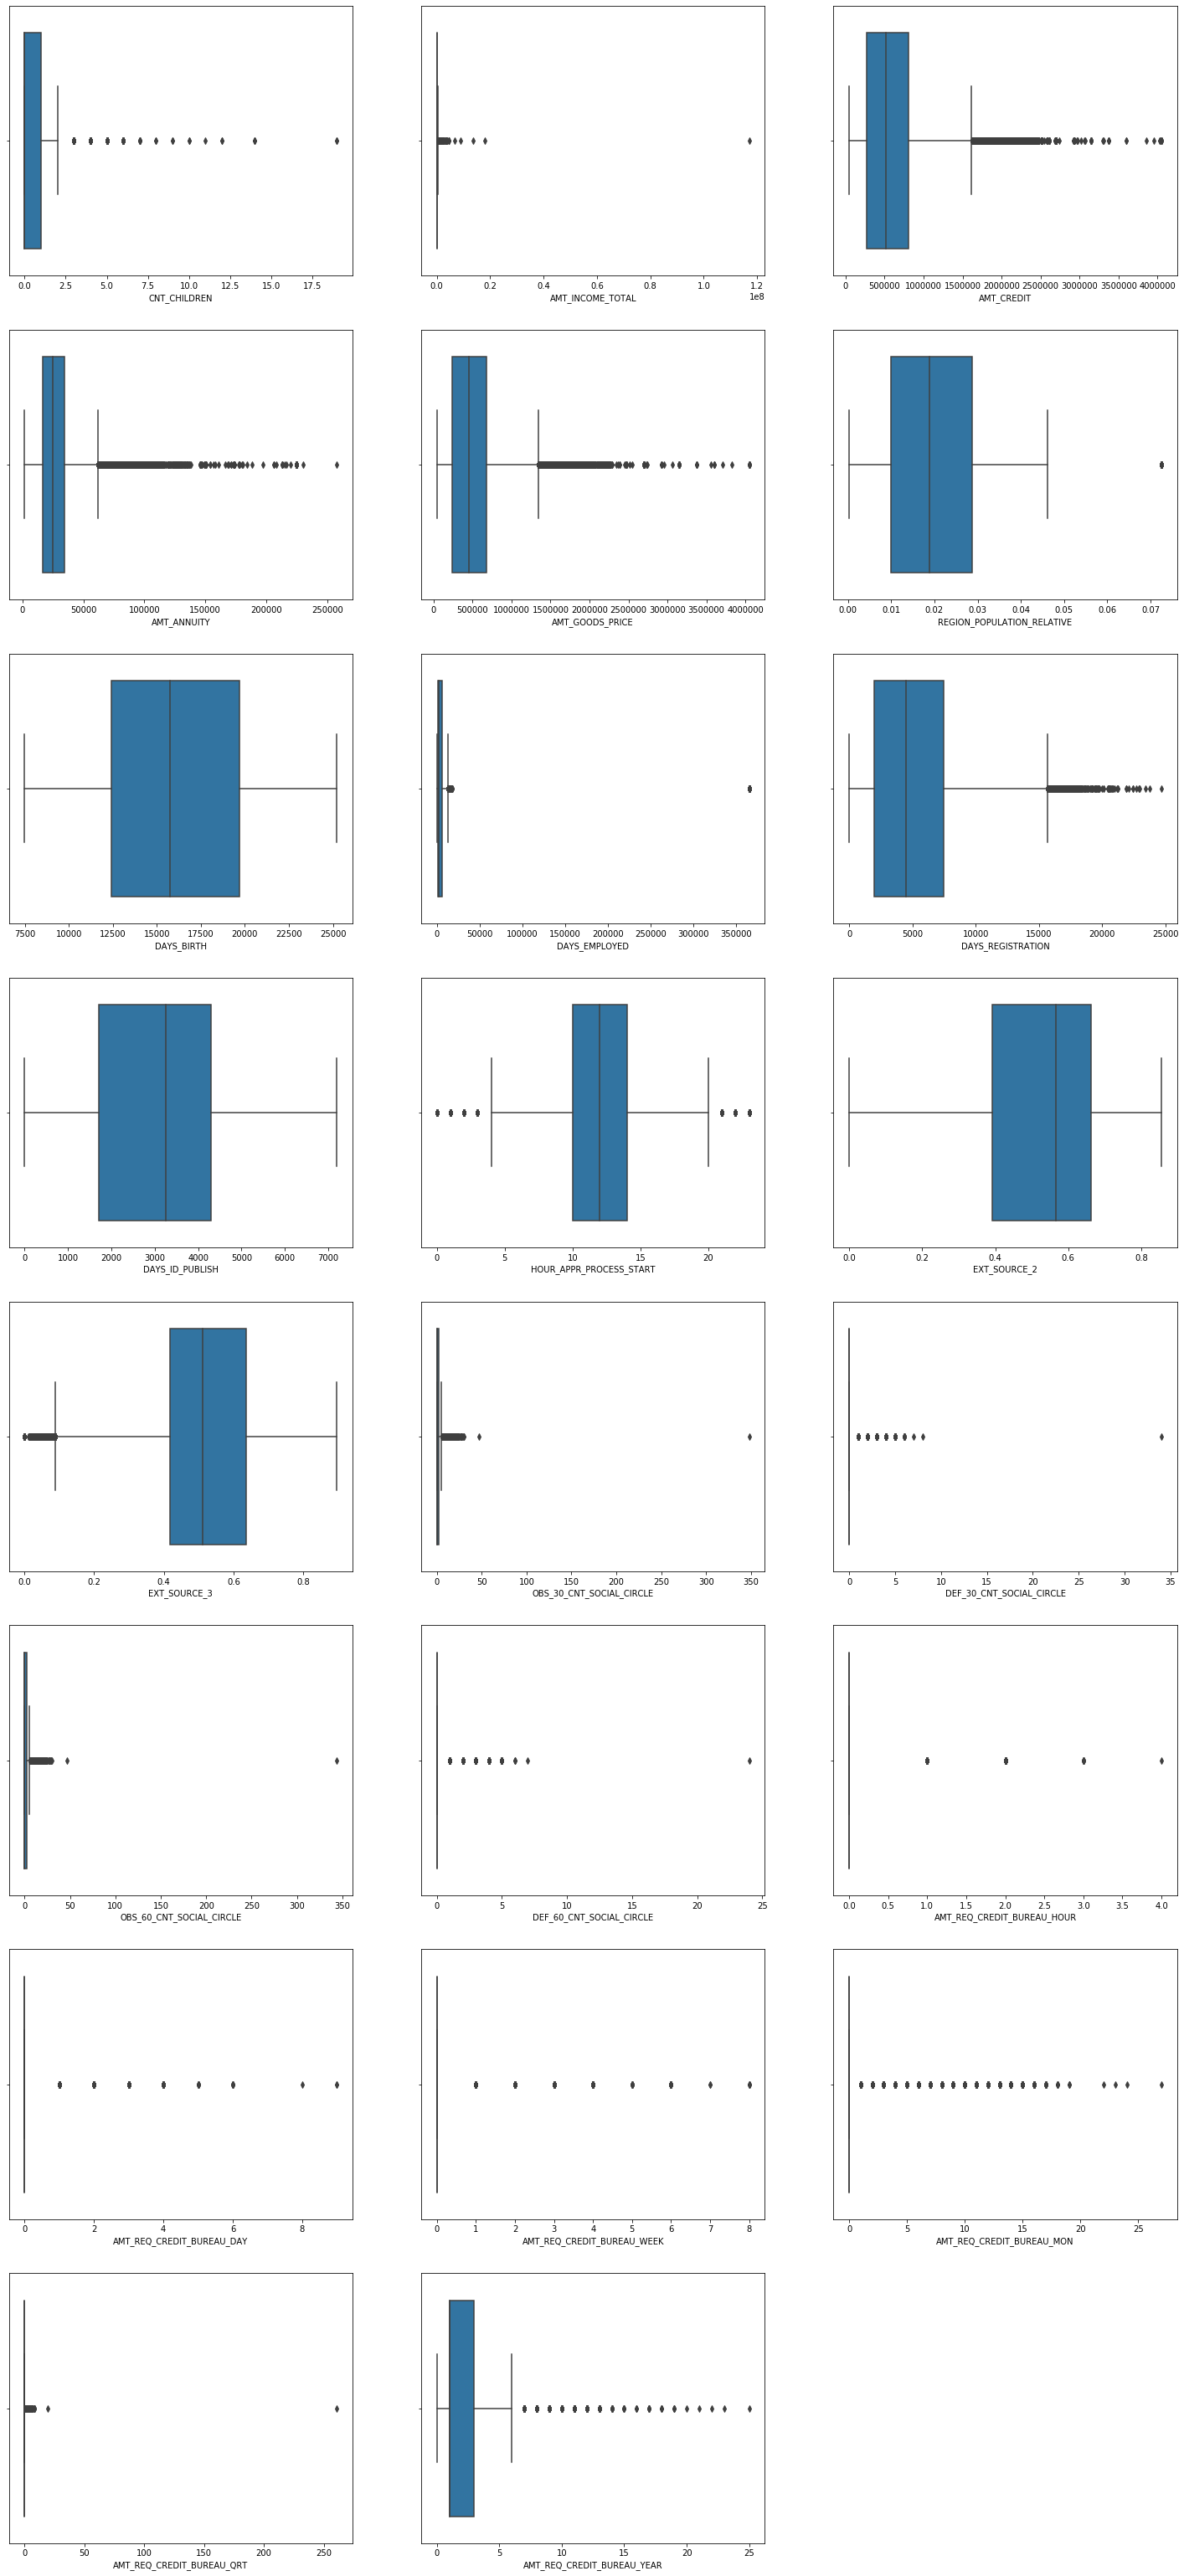

In [104]:
plt.figure(figsize = (25,70))
for i in enumerate(app_num): 
    ax = plt.subplot(10, 3, i[0]+1)
    sns.boxplot(app[i[1]])

- ##### DAYS_BIRTH, DAYS_ID_PUBLISH, and EXT_SOURCE_2 have no outliers.
- ##### Rest of columns have outliers.
- ##### Important: DAYS_EMPLOYED has data which are more 350000 days, which is nearly 1000 years.

## Let's check the  DAYS_EMPLOYED column

In [105]:
y = app['DAYS_EMPLOYED']
temp1 =pd.DataFrame(y)
temp1['DAYS_EMPLOYED'].value_counts()/len(temp1)

temp1['DAYS_EMPLOYED'].value_counts()/len(temp1)*100

365243    18.007161
200        0.050730
224        0.049429
199        0.049104
230        0.049104
            ...    
11555      0.000325
14832      0.000325
14719      0.000325
13344      0.000325
10893      0.000325
Name: DAYS_EMPLOYED, Length: 12574, dtype: float64

` Here 18% data are wrongly labled as 365243, as per my understanding these might be missing data, which were wrongly entered as 365243.` 

` Here, already the "DAYS_EMPLOYED" column is highly skewed as 55374 numbers of data are wrongly entered as 365243, so the calculated mean value of the column would give a bias value. Thus I am replacing the wrong value with median of the column.`


In [106]:
app['DAYS_EMPLOYED'].median()

2219.0

In [107]:
# replacing all wrongly entered values
app['DAYS_EMPLOYED']=app['DAYS_EMPLOYED'].replace(365243,app['DAYS_EMPLOYED'].median())

app['DAYS_EMPLOYED'].value_counts()/len(app)*100

2219     18.020494
200       0.050730
224       0.049429
199       0.049104
230       0.049104
           ...    
11555     0.000325
14719     0.000325
11133     0.000325
13344     0.000325
14991     0.000325
Name: DAYS_EMPLOYED, Length: 12573, dtype: float64

## `previous application data`

In [108]:
prev_datatype = prev_app.dtypes
prev_num = list(prev_datatype[prev_datatype != 'object'].index)
prev_catg = list(prev_datatype[prev_datatype == 'object'].index)

In [109]:
prev_num

['AMT_APPLICATION',
 'AMT_CREDIT',
 'HOUR_APPR_PROCESS_START',
 'DAYS_DECISION',
 'SELLERPLACE_AREA']

In [110]:
len(prev_num)

5

In [111]:
outliers=[]
for i in prev_num:
    Q1 = prev_app[i].quantile(0.20)
    Q3 = prev_app[i].quantile(0.80)
    IQR = Q3 - Q1
    mn = min(prev_app[i])
    mx = max(prev_app[i])
    ll = Q1-(1.5*IQR)
    ul = Q3+(1.5*IQR)
    me =prev_app[i].mean()
    md = prev_app[i].median()
    if mn<ll or mx>ul:
        outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),me,md,"YES"])
    else:
        outliers.append([i,np.format_float_positional(mn),np.format_float_positional(ll),np.format_float_positional(ul),np.format_float_positional(mx),me,md,"NO"])
        
  
outliers = pd.DataFrame(outliers, columns=['Column name','Min','Lower limit','Upper Limit','Max','Mean','Median','Outliers'])
outliers.sort_values(by='Outliers', ascending=False)


,Column name,Min,Lower limit,Upper Limit,Max,Mean,Median,Outliers
0,AMT_APPLICATION,0.,-337500.,562500.,6905160.,174269.769421,70816.5,YES
1,AMT_CREDIT,0.,-405000.,675000.,6905160.,195000.011725,80253.0,YES
2,HOUR_APPR_PROCESS_START,0.,1.,25.,23.,12.484856,12.0,YES
4,SELLERPLACE_AREA,-1.,-215.5,356.5,4000000.,318.390420,4.0,YES
3,DAYS_DECISION,2.,-1735.5,3532.5,2922.,882.038059,583.0,NO


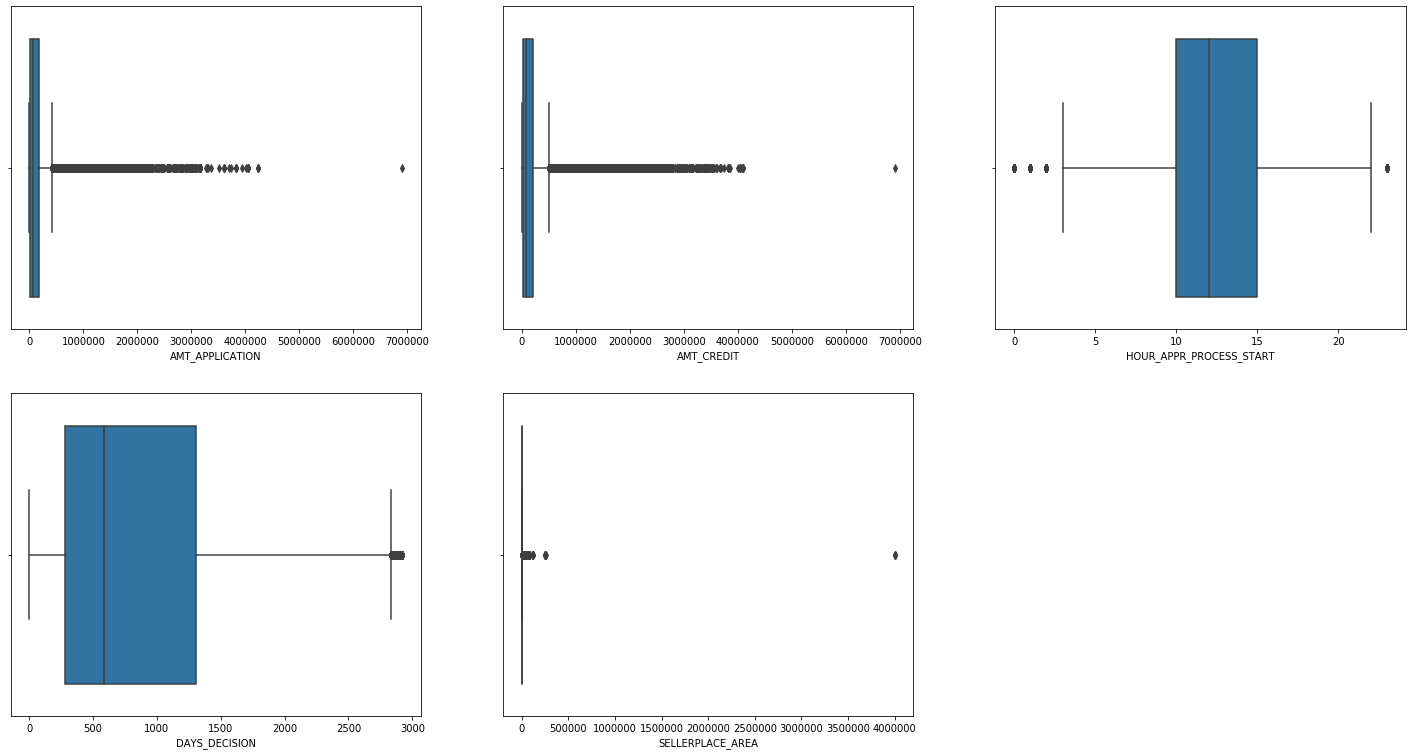

In [112]:
plt.figure(figsize = (25,70))
for i in enumerate(prev_num): 
    ax = plt.subplot(10, 3, i[0]+1)
    sns.boxplot(prev_app[i[1]])

##### `Except DAYS_DECISION all other columns have outliers.`

# Q4. Identify if there is data imbalance in the data. Find the ratio of data imbalance.

## `application data`

###### - Checking skewness for numeric data

In [113]:
app_datatype = app.dtypes
# Listing the numric columns name from the application data
app_num = list(app_datatype[app.dtypes != 'object'].index)

In [114]:
lst1=[]
for i in app_num:
    lst1.append([app[i].skew(),app[i].mean(),app[i].median(),np.format_float_positional((app[i].mean()-app[i].median()))])

Features=pd.DataFrame(app_num)
Skewness=pd.DataFrame(lst1)

skw=pd.concat([Features, Skewness], axis=1)
skw.columns = ['Features','Skewness','Mean','Median',"Mean-Median"]
skw_num=skw.sort_values(by='Skewness', ascending=False)

skw_num

,Features,Skewness,Mean,Median,Mean-Median
1,AMT_INCOME_TOTAL,391.559654,168797.919297,147150.000000,21647.919296984503
21,AMT_REQ_CREDIT_BUREAU_QRT,141.400915,0.229631,0.000000,0.22963080995476584
18,AMT_REQ_CREDIT_BUREAU_DAY,29.081577,0.006055,0.000000,0.0060550679487888235
17,AMT_REQ_CREDIT_BUREAU_HOUR,15.641990,0.005538,0.000000,0.005538013274321894
13,OBS_30_CNT_SOCIAL_CIRCLE,12.143796,1.417523,0.000000,1.4175232755901415
15,OBS_60_CNT_SOCIAL_CIRCLE,12.075153,1.400626,0.000000,1.4006263190585053
19,AMT_REQ_CREDIT_BUREAU_WEEK,10.008033,0.029723,0.000000,0.029722513991369416
20,AMT_REQ_CREDIT_BUREAU_MON,8.371505,0.231293,0.000000,0.23129253912868158
16,DEF_60_CNT_SOCIAL_CIRCLE,5.287339,0.099717,0.000000,0.09971675809971026
14,DEF_30_CNT_SOCIAL_CIRCLE,5.192572,0.142944,0.000000,0.14294448003486054


In [115]:
right_skew = skw_num.loc[(skw_num.Skewness > .5) ,:]
right_skew

,Features,Skewness,Mean,Median,Mean-Median
1,AMT_INCOME_TOTAL,391.559654,168797.919297,147150.00000,21647.919296984503
21,AMT_REQ_CREDIT_BUREAU_QRT,141.400915,0.229631,0.00000,0.22963080995476584
18,AMT_REQ_CREDIT_BUREAU_DAY,29.081577,0.006055,0.00000,0.0060550679487888235
17,AMT_REQ_CREDIT_BUREAU_HOUR,15.641990,0.005538,0.00000,0.005538013274321894
13,OBS_30_CNT_SOCIAL_CIRCLE,12.143796,1.417523,0.00000,1.4175232755901415
15,OBS_60_CNT_SOCIAL_CIRCLE,12.075153,1.400626,0.00000,1.4006263190585053
19,AMT_REQ_CREDIT_BUREAU_WEEK,10.008033,0.029723,0.00000,0.029722513991369416
20,AMT_REQ_CREDIT_BUREAU_MON,8.371505,0.231293,0.00000,0.23129253912868158
16,DEF_60_CNT_SOCIAL_CIRCLE,5.287339,0.099717,0.00000,0.09971675809971026
14,DEF_30_CNT_SOCIAL_CIRCLE,5.192572,0.142944,0.00000,0.14294448003486054


⬆️⬆️ <u>`Above data shows the data which are Positive Skewed or Right-Skewed (Mean > Median)`

In [116]:
left_skew = skw_num.loc[(skw_num.Skewness < -.5) ,:]
left_skew

,Features,Skewness,Mean,Median,Mean-Median
11,EXT_SOURCE_2,-0.794429,0.514393,0.565467,-0.05107448534840242


⬆️⬆️ <u>`Above data shows the data which are Negative Skewed or Left-Skewed (Mean < Median)`

 - ##### Non-nurmeric data or Categorical data

In [117]:
# Listing the categorical columns name from the application data
app_catg = list(app_datatype[app.dtypes == 'object'].index)

In [118]:
len(app_catg)

18

In [119]:
# Counting frequncy of each non-numeric columns
for i in app_catg:
    print(app[i].value_counts())

0    282686
1     24825
Name: TARGET, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Acad

###### ⬆️⬆️ Here in the Application data `TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR, and FLAG_OWN_REALTY` columns (Non-numeric) are binary datasets AND `NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, WEEKDAY_APPR_PROCESS_START, and ORGANIZATION_TYPE` multiclass datasets.

In [120]:
binary=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
# percentage (ratio) frequncy of binary non-numeric columns
for i in binary:
    print(round((app[i].value_counts()/len(app[i])*100),2))

0    91.93
1     8.07
Name: TARGET, dtype: float64
Cash loans         90.48
Revolving loans     9.52
Name: NAME_CONTRACT_TYPE, dtype: float64
F      65.83
M      34.16
XNA     0.00
Name: CODE_GENDER, dtype: float64
N    65.99
Y    34.01
Name: FLAG_OWN_CAR, dtype: float64
Y    69.37
N    30.63
Name: FLAG_OWN_REALTY, dtype: float64


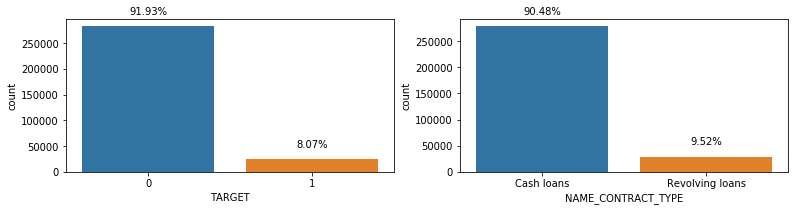

In [121]:
# countplots (percentage) of imbalannced binary datasets
binary1=['TARGET','NAME_CONTRACT_TYPE']
plt.figure(figsize=(20,50))
for i in enumerate(binary1): 
    ax = plt.subplot(15,3, i[0]+1)
    sns.countplot(x=i[1], data=app)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(app)),
                ha="center")

#### Conclusions:
`⬆️⬆️In the binary datasets TARGET (0:91.93%) and NAME_CONTRACT_TYPE (Cash loans: 90.48%) columns are highly imbalanced. `

In [122]:
# percentage (ratio) frequncy of non-numeric columns
multiclass=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE']
for i in multiclass:
    print(round((app[i].value_counts()/len(app[i])*100),2))

Unaccompanied      81.24
Family             13.06
Spouse, partner     3.70
Children            1.06
Other_B             0.58
Other_A             0.28
Group of people     0.09
Name: NAME_TYPE_SUITE, dtype: float64
Working                 51.63
Commercial associate    23.29
Pensioner               18.00
State servant            7.06
Unemployed               0.01
Student                  0.01
Businessman              0.00
Maternity leave          0.00
Name: NAME_INCOME_TYPE, dtype: float64
Secondary / secondary special    71.02
Higher education                 24.34
Incomplete higher                 3.34
Lower secondary                   1.24
Academic degree                   0.05
Name: NAME_EDUCATION_TYPE, dtype: float64
Married                 63.88
Single / not married    14.78
Civil marriage           9.68
Separated                6.43
Widow                    5.23
Unknown                  0.00
Name: NAME_FAMILY_STATUS, dtype: float64
House / apartment      88.73
With parents         

`Most of the applicant's organization type is either Business Entity Type 3 or XNA or Self-employed`

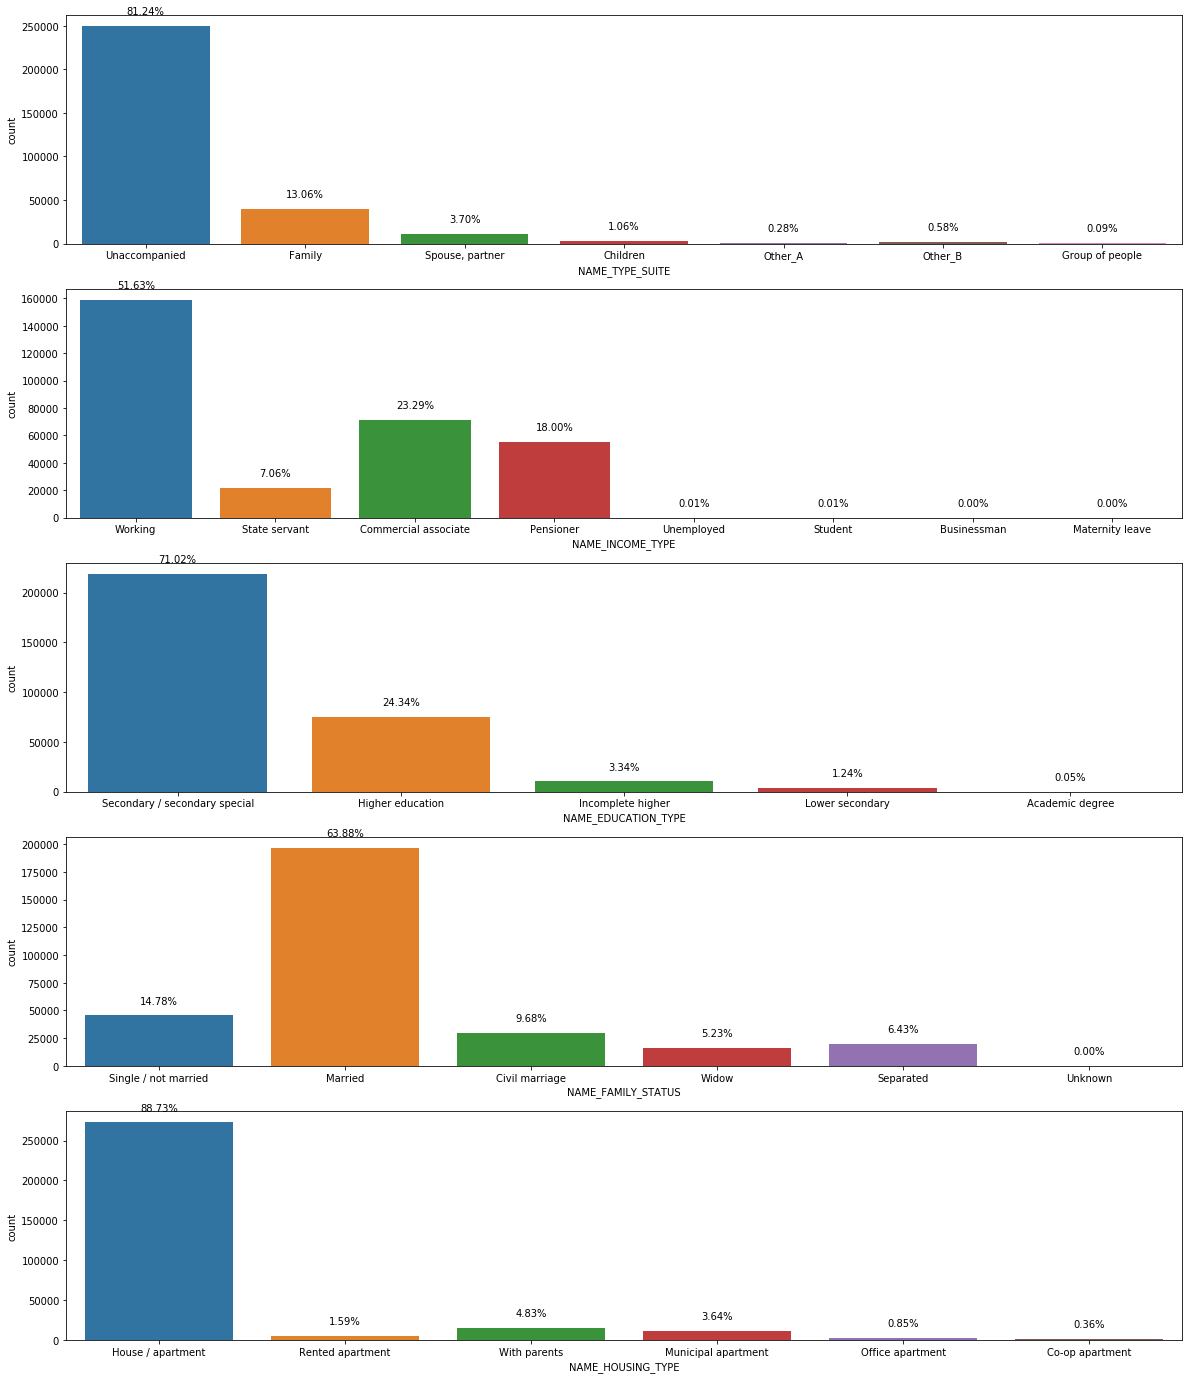

In [123]:
# countplots of imbalanced datasets
multiclass1=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE']
plt.figure(figsize=(20,100))
for i in enumerate(multiclass1): 
    ax = plt.subplot(20,1, i[0]+1)
    sns.countplot(x=i[1], data=app)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(app)),
                ha="center")

`⬆️⬆️ In the multiclass datasets:`

- ###### 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', and 'NAME_HOUSING_TYPE' colums are  imbalanced. 

## `previous application data`

#### ` Numeric data`

In [124]:
lst1=[]
for i in prev_num:
    lst1.append([prev_app[i].skew(),prev_app[i].mean(),prev_app[i].median(),np.format_float_positional((prev_app[i].mean()-prev_app[i].median()))])

Features=pd.DataFrame(prev_num)
Skewness=pd.DataFrame(lst1)

skw=pd.concat([Features, Skewness], axis=1)
skw.columns = ['Features','Skewness','Mean','Median',"Mean-Median"]
skw_num=skw.sort_values(by='Skewness', ascending=False)

skw_num

,Features,Skewness,Mean,Median,Mean-Median
4,SELLERPLACE_AREA,477.768999,318.390420,4.0,314.3904203323558
0,AMT_APPLICATION,3.390787,174269.769421,70816.5,103453.26942099651
1,AMT_CREDIT,3.255049,195000.011725,80253.0,114747.01172482444
3,DAYS_DECISION,1.050799,882.038059,583.0,299.03805927091526
2,HOUR_APPR_PROCESS_START,-0.024457,12.484856,12.0,0.4848561142502916


#### ` Categoric data`

In [125]:
# Counting frequncy of each non-numeric columns
for i in prev_catg:
    print(prev_app[i].value_counts(normalize=True)*100)

Cash loans         44.428009
Consumer loans     43.969101
Revolving loans    11.581527
XNA                 0.021362
Name: NAME_CONTRACT_TYPE, dtype: float64
TUESDAY      15.286460
WEDNESDAY    15.236583
MONDAY       15.180412
FRIDAY       15.082088
THURSDAY     14.879336
SATURDAY     14.451327
SUNDAY        9.883795
Name: WEEKDAY_APPR_PROCESS_START, dtype: float64
Y    99.487686
N     0.512314
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64
1    99.641227
0     0.358773
Name: NFLAG_LAST_APPL_IN_DAY, dtype: float64
XAP                                 55.571991
XNA                                 40.294400
Repairs                              1.408292
Other                                0.921632
Urgent needs                         0.506306
Buying a used car                    0.170136
Building a house or an annex         0.160408
Everyday expenses                    0.141812
Medicine                             0.133705
Payments on other loans              0.115395
Education         

In [126]:
# Binary imbalanced data
binary=['FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']
# multiclass imbalanced data
multiclass = ['NAME_CONTRACT_STATUS','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE']

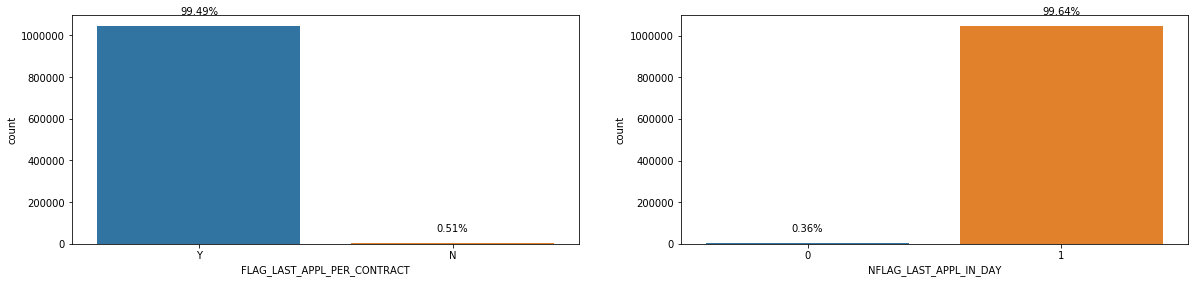

In [127]:
# countplots of imbalanced datasets
plt.figure(figsize=(20,100))
for i in enumerate(binary): 
    ax = plt.subplot(20,2, i[0]+1)
    sns.countplot(x=i[1], data=prev_app)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(prev_app)),
                ha="center")

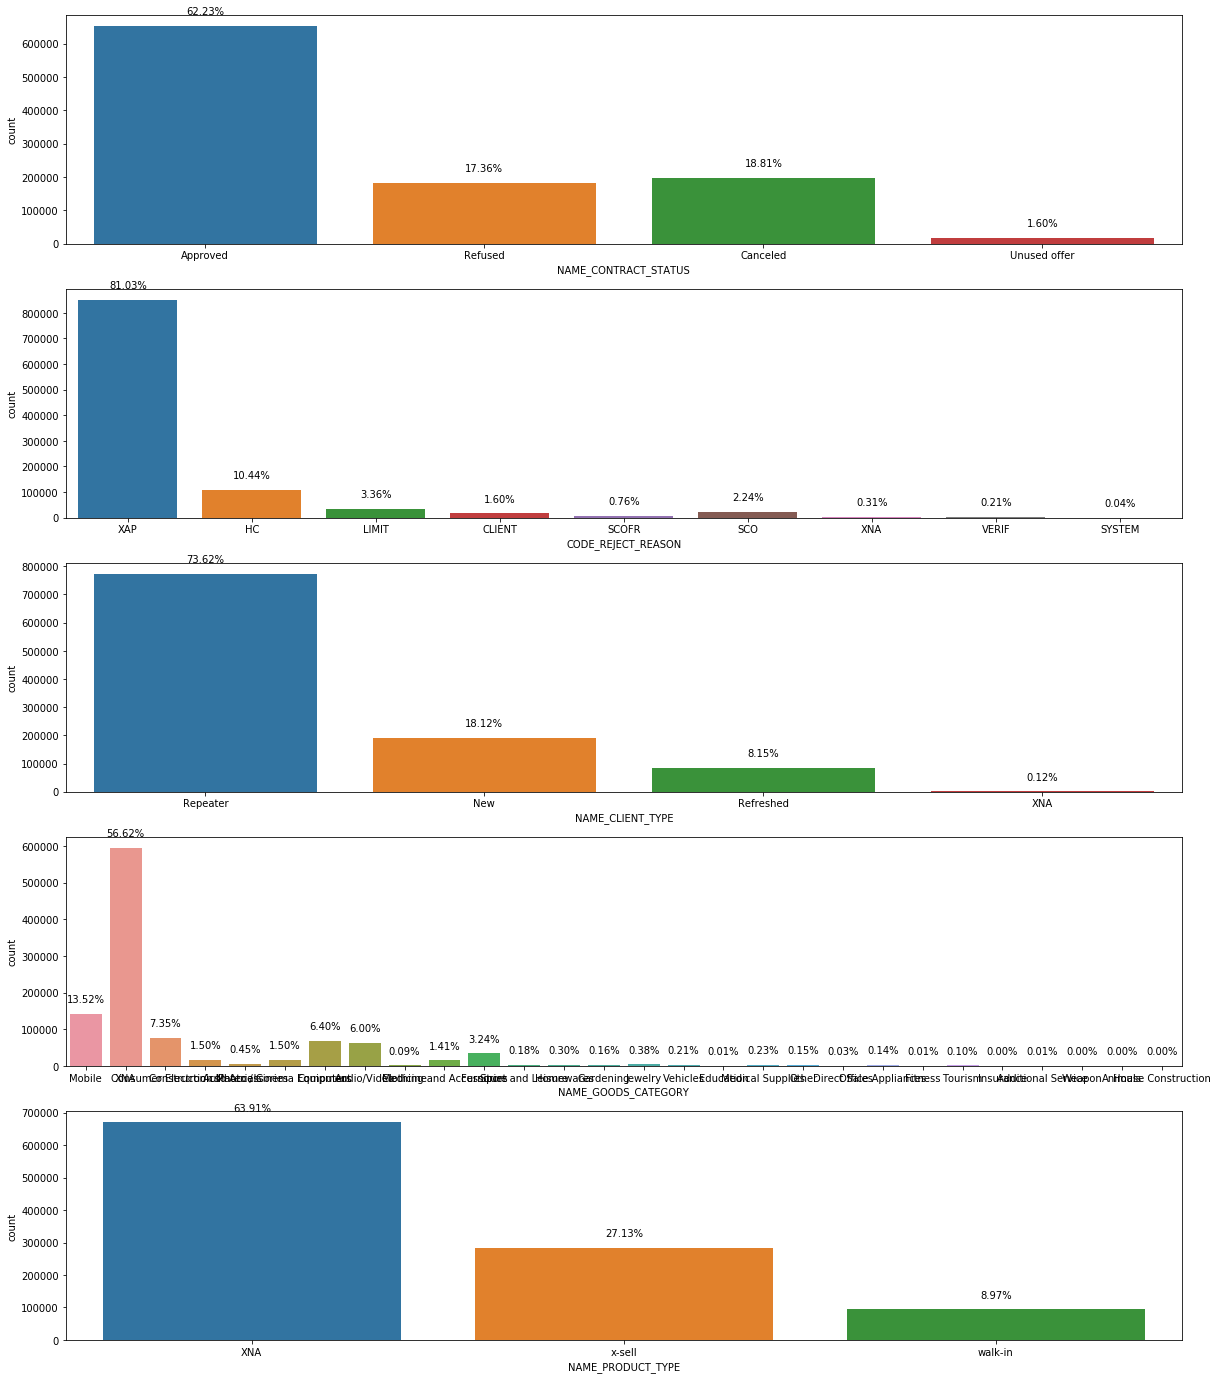

In [128]:
# countplots of imbalanced datasets
plt.figure(figsize=(20,100))
for i in enumerate(multiclass): 
    ax = plt.subplot(20,1, i[0]+1)
    sns.countplot(x=i[1], data=prev_app)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(prev_app)),
                ha="center")

- ##### In previous application data `'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_CONTRACT_STATUS', 'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PRODUCT_TYPE'` columns are highly imbalanced.

# Q5. Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.

# <u> EDA:

 ## Univariate, Segmented univariate & Bivariate analysis of numeric data:

## ` application data`

In [129]:
import statistics as st

In [130]:
# Basic statistics
def stat(x):
    IQR = x.quantile(0.75)-x.quantile(0.25)
    ul = round(x.quantile(0.75)+(1.5*IQR),2)
    ll = round(x.quantile(0.25)-(1.5*IQR),2)
    print("Basic statistics")
    print("count: ",len(x))
    print("min: ",round(min(x),2))
    print("lower limit: ",ll)
    print("max: ",round(max(x),2))
    print("upper limit: ",ul)
    print("mean: ",round(x.mean(),2))
    print("median: ",round(x.median(),2))
    print("SD: ",round(st.stdev(x),2))

In [131]:
dup = app.copy()

In [132]:
dup.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.510853,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.510853,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### ` AMT_INCOME_TOTAL`

In [133]:
dup['AMT_INCOME_TOTAL'].head()

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [134]:
dup['AMT_INCOME_TOTAL'] = dup['AMT_INCOME_TOTAL']/100000

In [135]:
stat(dup['AMT_INCOME_TOTAL'])

Basic statistics
count:  307511
min:  0.26
lower limit:  -0.22
max:  1170.0
upper limit:  3.38
mean:  1.69
median:  1.47
SD:  2.37


In [136]:
bins = [0,1,2,3,4,5,6,7,8,9,10,1200]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-1M', '1M Above']

dup['AMT_INCOME_RANGE']=pd.cut(dup['AMT_INCOME_TOTAL'],bins,labels=slot)

In [137]:
round(dup['AMT_INCOME_RANGE'].value_counts()/len(dup['AMT_INCOME_RANGE'])*100,2)

1L-2L       50.70
2L-3L       21.19
0-1L        20.71
3L-4L        4.77
4L-5L        1.74
5L-6L        0.36
6L-7L        0.28
8L-9L        0.10
1M Above     0.08
7L-8L        0.05
9L-1M        0.01
Name: AMT_INCOME_RANGE, dtype: float64

#### <u> Defining a function to comapre 'TARGET' to other variables

In [138]:
def tagVScat(x):
    df=dup[[x,'TARGET']]
    val1 = df.loc[(df['TARGET'] == 0),:][x].value_counts()
    val2 = df[x].value_counts()
    mm = pd.DataFrame(100*val1.values/val2.values,val1.index)
    mm['1']=pd.DataFrame(100*(1-(val1.values/val2)))
    print(x,' v/s % TARGET')
    return mm   

In [139]:
tagVScat('AMT_INCOME_RANGE')

AMT_INCOME_RANGE  v/s % TARGET


,0,1
1L-2L,91.452103,8.547897
2L-3L,92.449675,7.550325
0-1L,91.797231,8.202769
3L-4L,93.969747,6.030253
4L-5L,93.993658,6.006342
5L-6L,93.698630,6.301370
6L-7L,95.166858,4.833142
8L-9L,94.295302,5.704698
1M Above,94.800000,5.200000
7L-8L,98.148148,1.851852


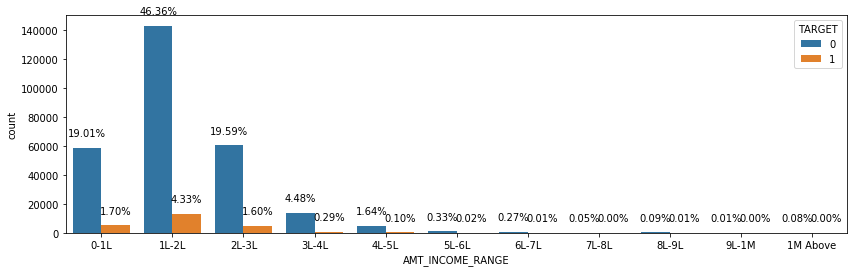

In [140]:
plt.figure(figsize=(14,4))
ax=sns.countplot(dup['AMT_INCOME_RANGE'],hue =app['TARGET'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(100 * height/len(dup['AMT_INCOME_RANGE'])),
            ha="center")

##### Observation:  
- More than 50% of people who applied for the loan has income range between 1-2 Lakh.
- Among the applicants with 7 lakh to 8 lakh income range, more than 98% people don't face any payment difficulties.

### ` AMT_CREDIT`

In [141]:
dup['AMT_CREDIT'].head()

0     406597.5
1    1293502.5
2     135000.0
3     312682.5
4     513000.0
Name: AMT_CREDIT, dtype: float64

In [142]:
dup['AMT_CREDIT']=dup['AMT_CREDIT']/100000
dup['AMT_CREDIT'].head()

0     4.065975
1    12.935025
2     1.350000
3     3.126825
4     5.130000
Name: AMT_CREDIT, dtype: float64

In [143]:
stat(dup['AMT_CREDIT'])

Basic statistics
count:  307511
min:  0.45
lower limit:  -5.38
max:  40.5
upper limit:  16.17
mean:  5.99
median:  5.14
SD:  4.02


In [144]:
bins = [0,1,2,3,4,5,6,7,8,9,10,50]
slot = ['0-1L','1L-2L', '2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-1M', '1M Above']

dup['AMT_CREDIT_RANGE']=pd.cut(dup['AMT_CREDIT'],bins,labels=slot)

In [145]:
dup['AMT_CREDIT_RANGE'].value_counts(normalize= True)*100

2L-3L       17.824728
1M Above    16.254703
5L-6L       11.131960
4L-5L       10.418489
1L-2L        9.801275
3L-4L        8.564897
6L-7L        7.820533
8L-9L        7.086576
7L-8L        6.241403
9L-1M        2.902986
0-1L         1.952450
Name: AMT_CREDIT_RANGE, dtype: float64

In [146]:
tagVScat('AMT_CREDIT_RANGE')

AMT_CREDIT_RANGE  v/s % TARGET


,0,1
2L-3L,92.116834,7.883166
1M Above,94.134240,5.865760
5L-6L,89.708460,10.291540
4L-5L,90.102378,9.897622
1L-2L,92.836762,7.163238
3L-4L,90.041005,9.958995
6L-7L,91.280303,8.719697
8L-9L,92.864354,7.135646
7L-8L,92.361799,7.638201
9L-1M,92.752324,7.247676


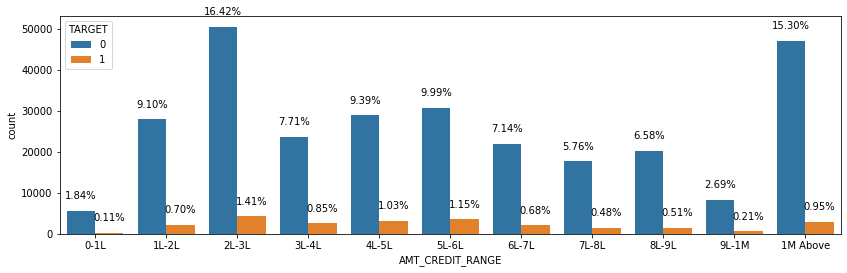

In [147]:
plt.figure(figsize=(14,4))
ax=sns.countplot(dup['AMT_CREDIT_RANGE'],hue =dup['TARGET'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(100 * height/len(dup)),
            ha="center")

##### Observation: 
- Major loan application are for loan amount between 2-3 lakh. 
- There is significant numbers (16.25%) of applicants who have applied for loan amount more than 1 million, among them nearly 95% don't face any payment difficulties.

### `DAYS_BIRTH`

In [148]:
dup['DAYS_BIRTH'].head()

0     9461
1    16765
2    19046
3    19005
4    19932
Name: DAYS_BIRTH, dtype: int64

In [149]:
dup['Age'] = dup['DAYS_BIRTH']/365
dup['Age'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: Age, dtype: float64

In [150]:
stat(dup['Age'])

Basic statistics
count:  307511
min:  20.52
lower limit:  4.14
max:  69.12
upper limit:  83.8
mean:  43.94
median:  43.15
SD:  11.96


In [151]:
bins = [20,30,40,50,60,70]
slot = ['20-30','30-40', '40-50','50-60','Senior citizen']

dup['Age']=pd.cut(dup['Age'],bins,labels=slot)

In [152]:
round(dup['Age'].value_counts()/len(dup['Age'])*100,2)

30-40             26.77
40-50             24.89
50-60             22.13
20-30             14.64
Senior citizen    11.57
Name: Age, dtype: float64

In [153]:
tagVScat('Age')

Age  v/s % TARGET


,0,1
30-40,90.416484,9.583516
40-50,92.349198,7.650802
50-60,93.870295,6.129705
20-30,88.543124,11.456876
Senior citizen,95.078558,4.921442


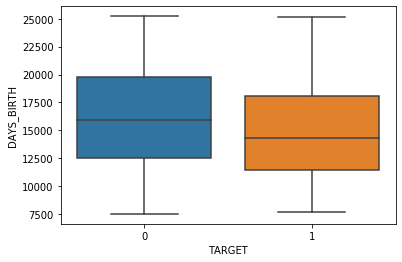

In [154]:
sns.boxplot(x = 'TARGET', y = 'DAYS_BIRTH', data = app)

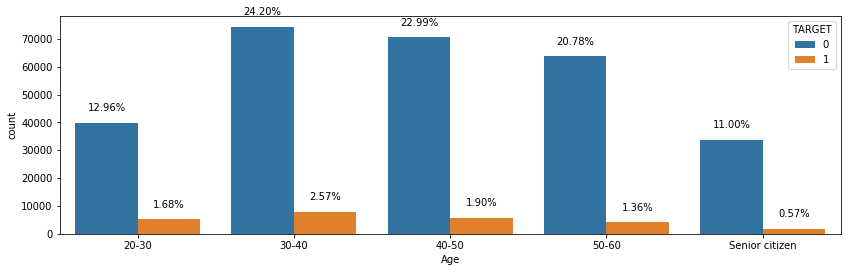

In [155]:
plt.figure(figsize=(14,4))
ax=sns.countplot(dup['Age'],hue =dup['TARGET'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(100 * height/len(app)),
            ha="center")

##### Observation: 
- Those who have applied for loan, among them age between 30-40 people are most. Here We can see that more than 11% of people who are senior citizen (Age above 60) applied for loan and overall more than 30% of applicant are aged more than 30.
- Older people face less payment difficulties than the yonger people, As we can see that among senior citizen less than 5% applicants face payment difficulties.


### `DAYS_EMPLOYED`

In [156]:
dup['DAYS_EMPLOYED'].head()

0     637
1    1188
2     225
3    3039
4    3038
Name: DAYS_EMPLOYED, dtype: int64

In [157]:
dup['YEARS_EMPLOYED'] = dup['DAYS_EMPLOYED'] // 365
dup['YEARS_EMPLOYED'].head()

0    1
1    3
2    0
3    8
4    8
Name: YEARS_EMPLOYED, dtype: int64

In [158]:
stat(dup['YEARS_EMPLOYED'])

Basic statistics
count:  307511
min:  0
lower limit:  -5.5
max:  49
upper limit:  14.5
mean:  6.03
median:  6.0
SD:  5.81


In [159]:
bins = [0,5,10,20,30,40,50]
slots = ['0-5','5-10','10-20','20-30','30-40','40-above']

dup['EMPLOYMENT_YEAR']=pd.cut(dup['YEARS_EMPLOYED'],bins=bins,labels=slots)

In [160]:
round(dup['EMPLOYMENT_YEAR'].value_counts()/len(dup['EMPLOYMENT_YEAR'])*100,2)

0-5         40.53
5-10        36.21
10-20       10.62
20-30        2.73
30-40        0.77
40-above     0.06
Name: EMPLOYMENT_YEAR, dtype: float64

In [161]:
tagVScat('EMPLOYMENT_YEAR')

EMPLOYMENT_YEAR  v/s % TARGET


,0,1
0-5,89.838246,10.161754
5-10,93.785752,6.214248
10-20,94.745545,5.254455
20-30,95.433464,4.566536
30-40,96.882898,3.117102
40-above,99.428571,0.571429


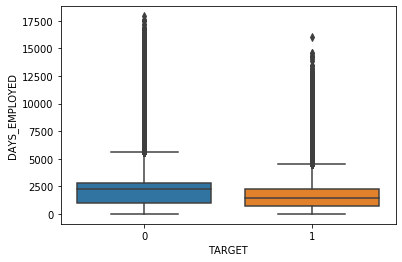

In [162]:
sns.boxplot(x = 'TARGET', y = 'DAYS_EMPLOYED', data = app)

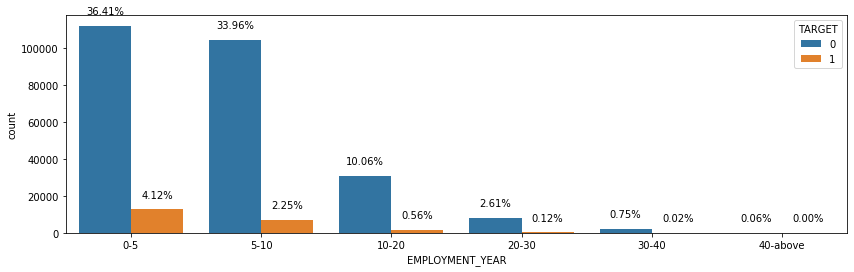

In [163]:
plt.figure(figsize=(14,4))
ax=sns.countplot(dup['EMPLOYMENT_YEAR'],hue =dup['TARGET'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(100 * height/len(app)),
            ha="center")

##### Observation:  
- People are lilkely to apply for loan at their early career, here more 40% of applicant's employment year is between 0-5 years and  more 36% of applicant's employment year is between 5-10 years.
- Applicant who have applied for loan at their early careers face difficulties in loan repayment. And who have working for more than 40 year, among them less the 1% appliacnt face payment difficulties.

## Correlation between`TARGET` and other numeric columns

#### `Correlation( Categorical variable & Numeric variable)`

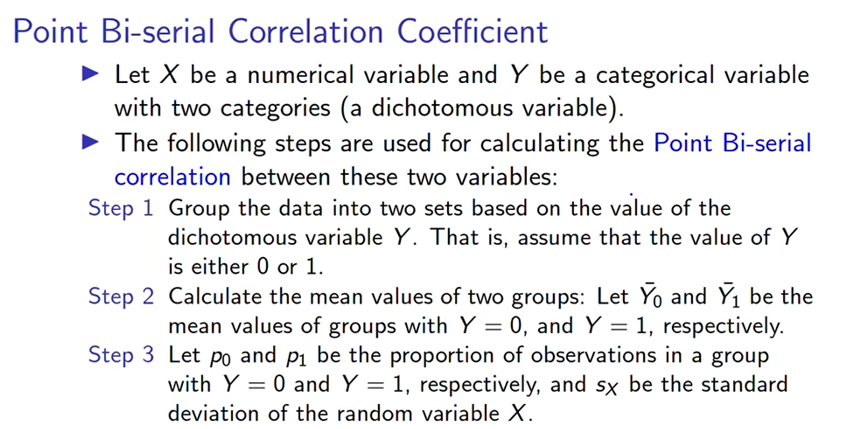

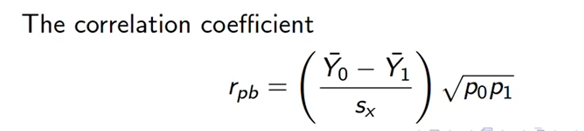

##### `Ref:` https://youtu.be/0q40C-Qu5TE

##### `Let's create a function to calculate the Bi-serial Correlation Coefficient`

In [164]:
def bis_corr(x):
    y0_bar=app.loc[app['TARGET']==0,:][x].mean()
    y1_bar=app.loc[app['TARGET']==1,:][x].mean()
    p0=len(app.loc[app['TARGET']==0,:])/len(app)
    p1=len(app.loc[app['TARGET']==1,:])/len(app)
    sd=app[x].describe ()[2]
    return [x, ((y0_bar-y1_bar)/sd)*((p0*p1)**.5)]

In [165]:
df=[]
for i in app_num:
    df.append(bis_corr(i))
df=pd.DataFrame(df,columns=["Variable","Bi-serial Corr"])
df=df.sort_values(by='Bi-serial Corr', ascending=False)

In [166]:
# top 5 +ve corr
top=df.head(5)
top

,Variable,Bi-serial Corr
11,EXT_SOURCE_2,0.160303
12,EXT_SOURCE_3,0.157396
6,DAYS_BIRTH,0.078239
7,DAYS_EMPLOYED,0.068665
9,DAYS_ID_PUBLISH,0.051457


##### `Here I can observe some +ve correlation between TARGET and 'EXT_SOURCE_2','EXT_SOURCE_3','DAYS_BIRTH','DAYS_EMPLOYED', and 'DAYS_ID_PUBLISH'`

### Let's visualize them

In [167]:
bisl=[]
for i in top['Variable']:
    bisl.append(i)

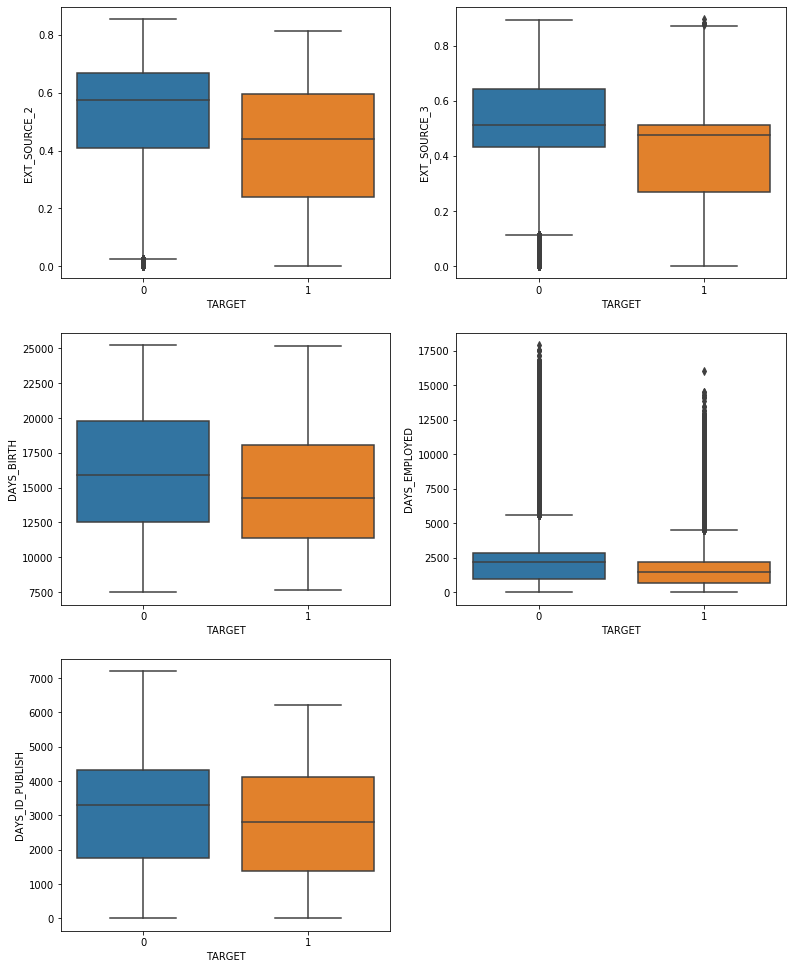

In [168]:
plt.figure(figsize=(13,17))

for j in bisl:
    plt.subplot((len(bisl)//2)+1,2,(bisl.index(j)) + 1)
    sns.boxplot(x = 'TARGET', y = j, data = app)

#### `⬆️⬆️⬆️ Here relations are clearly visible `

- ##### Here, we can observe that applicant with higher EXT_SOURCE_2 & EXT_SOURCE_3 are more likely to not face any payment difficulties.
- ##### Older people face less payment difficulties than the yonger people.
- ##### Applicant who have applied for loan at their early careers face difficulties in loan repayment.
- ##### Applicant who have lesser DAYS_ID_PUBLISH face difficulties in loan repayment.

## `Let's check correlation within numeric variables`

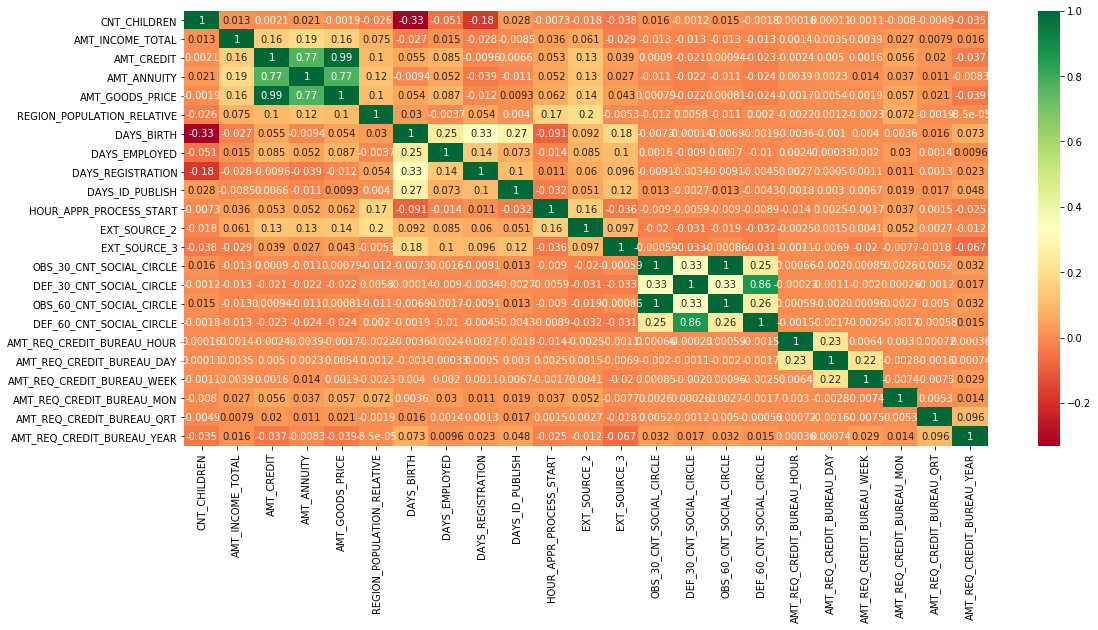

In [169]:
plt.figure(figsize=(18,8))
corr = app.corr()
ax = sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True,
            cmap ="RdYlGn")

##### From the above correlation table we can see that `['AMT_ANNUITY','AMT_CREDIT'],['AMT_CREDIT','AMT_GOODS_PRICE'],  & ['DEF_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'] `are +ve-ly  corelated and `['DAYS_BIRTH','CNT_CHILDREN' ]` are -ve-ly corelated.

#### ` Let's find top 10 correlation from the above matrix`

- STEP 1: Identify the redundant pairs.
- STEP 2: Calculate the correlation matrix.
- STEP 3: Unstuck the correlation matrix.
- STEP 4: Drop the redundant pairs.
- STEP 5: Sort values by descending order

In [170]:
def get_redundant_pairs(df):
    pairs_to_drop = set()
    df_datatype = df.dtypes
    cols = list(df_datatype[df_datatype != 'object'].index)
    df=df[cols]
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [171]:
get_top_abs_correlations(app,5)

OBS_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE    0.998491
AMT_CREDIT                AMT_GOODS_PRICE             0.986734
DEF_30_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE    0.860556
AMT_ANNUITY               AMT_GOODS_PRICE             0.774848
AMT_CREDIT                AMT_ANNUITY                 0.770138
dtype: float64

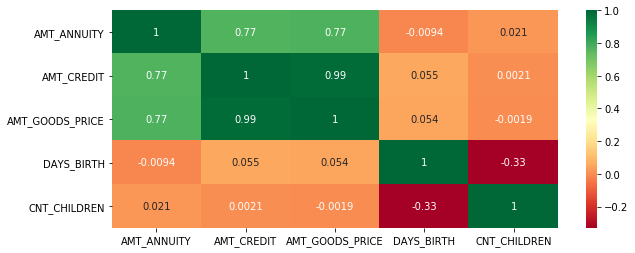

In [172]:
plt.figure(figsize=(10,4))
corr = app[['AMT_ANNUITY','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_BIRTH','CNT_CHILDREN']].corr()
ax = sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True,
            cmap ="RdYlGn")

#### `Observations:`
- ##### For higher credit amount the annuity is also higher
- ##### If goods price is higher the applicant is likely to get higher credit amount
- ##### Surprisingly, among the applicant older people have less children than the younger people.

## Univariate, Segmented univariate & Bivariate analysis of categorical data: 


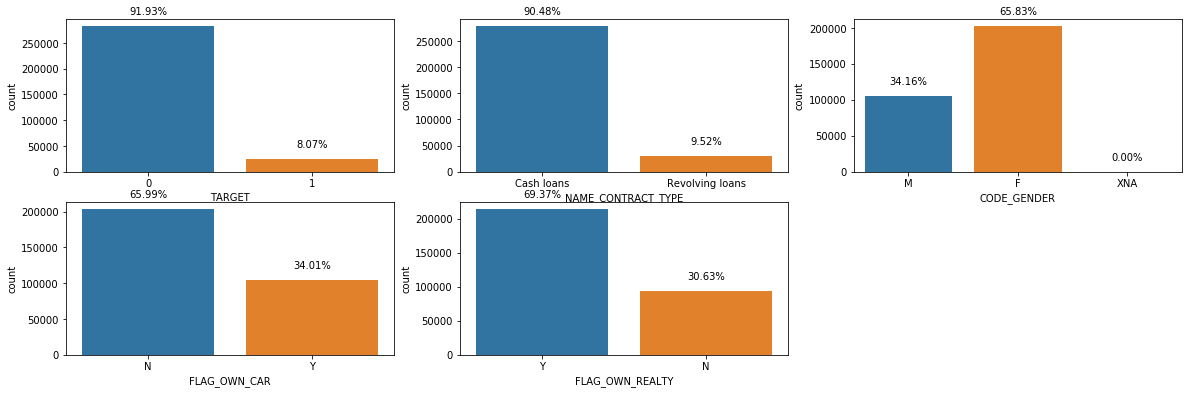

In [173]:
binary=['TARGET','NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
plt.figure(figsize=(20,50))
for i in enumerate(binary): 
    ax = plt.subplot(15,3, i[0]+1)
    sns.countplot(x=i[1], data=dup)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(app)),
                ha="center")

- Here most of the applicants (91.93%) don't have any payment deficulties.
- 90.48% applied for Cash loan.
- 65.83% of the applicants are female.
- Nearly 66% of the appliants have their own car.
- Nearly 70% of the client owns a house or flat.

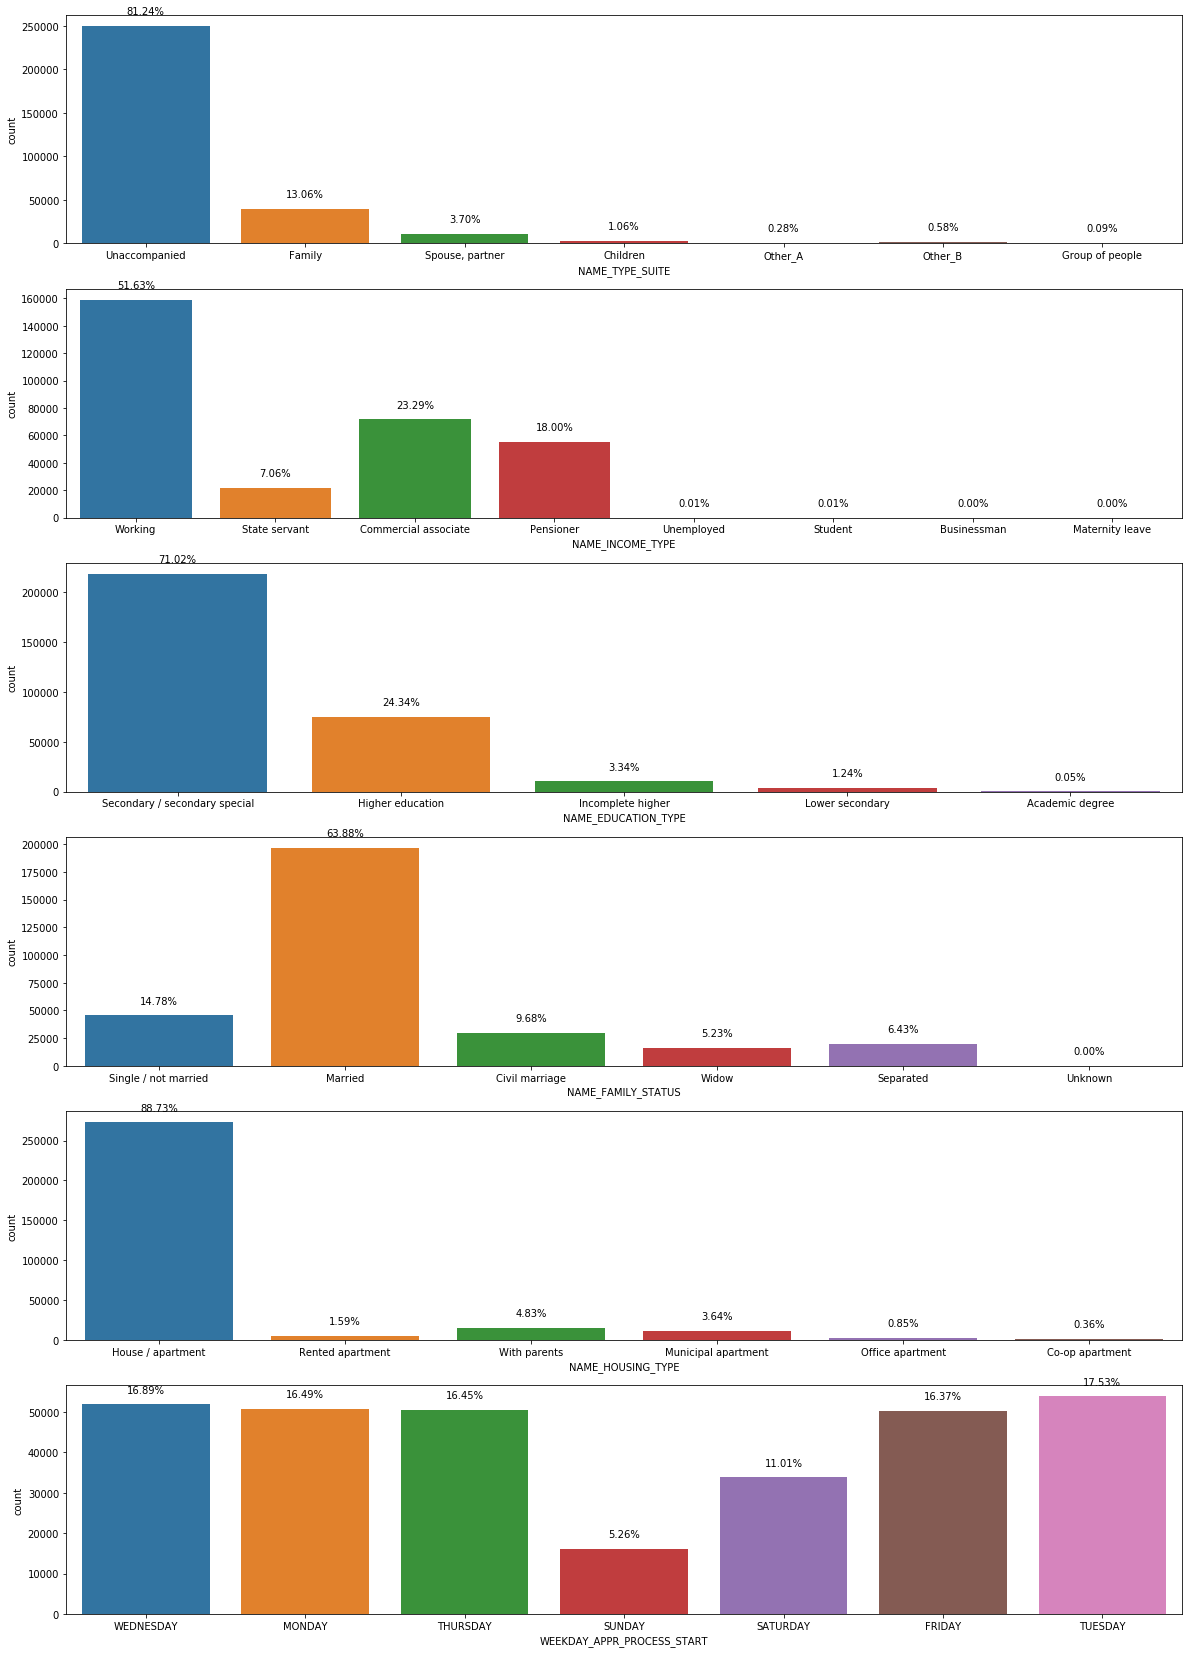

In [174]:
multiclass1=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
        'WEEKDAY_APPR_PROCESS_START']
plt.figure(figsize=(20,100))
for i in enumerate(multiclass1): 
    ax = plt.subplot(20,1, i[0]+1)
    sns.countplot(x=i[1], data=app)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(app)),
                ha="center")

- More than 80 of the clients came solo for their loan application.
- More than 50 of the clients are working.
- Nearly 72% of the applicants have completed their secondary education.
- Nearly 90% of the applicants are staying in their own house.
- Surprisingly here I can see that more than 16% (Saturday: 11.01% & Sunday: 5.26%) of the application were proceed on the weekends.

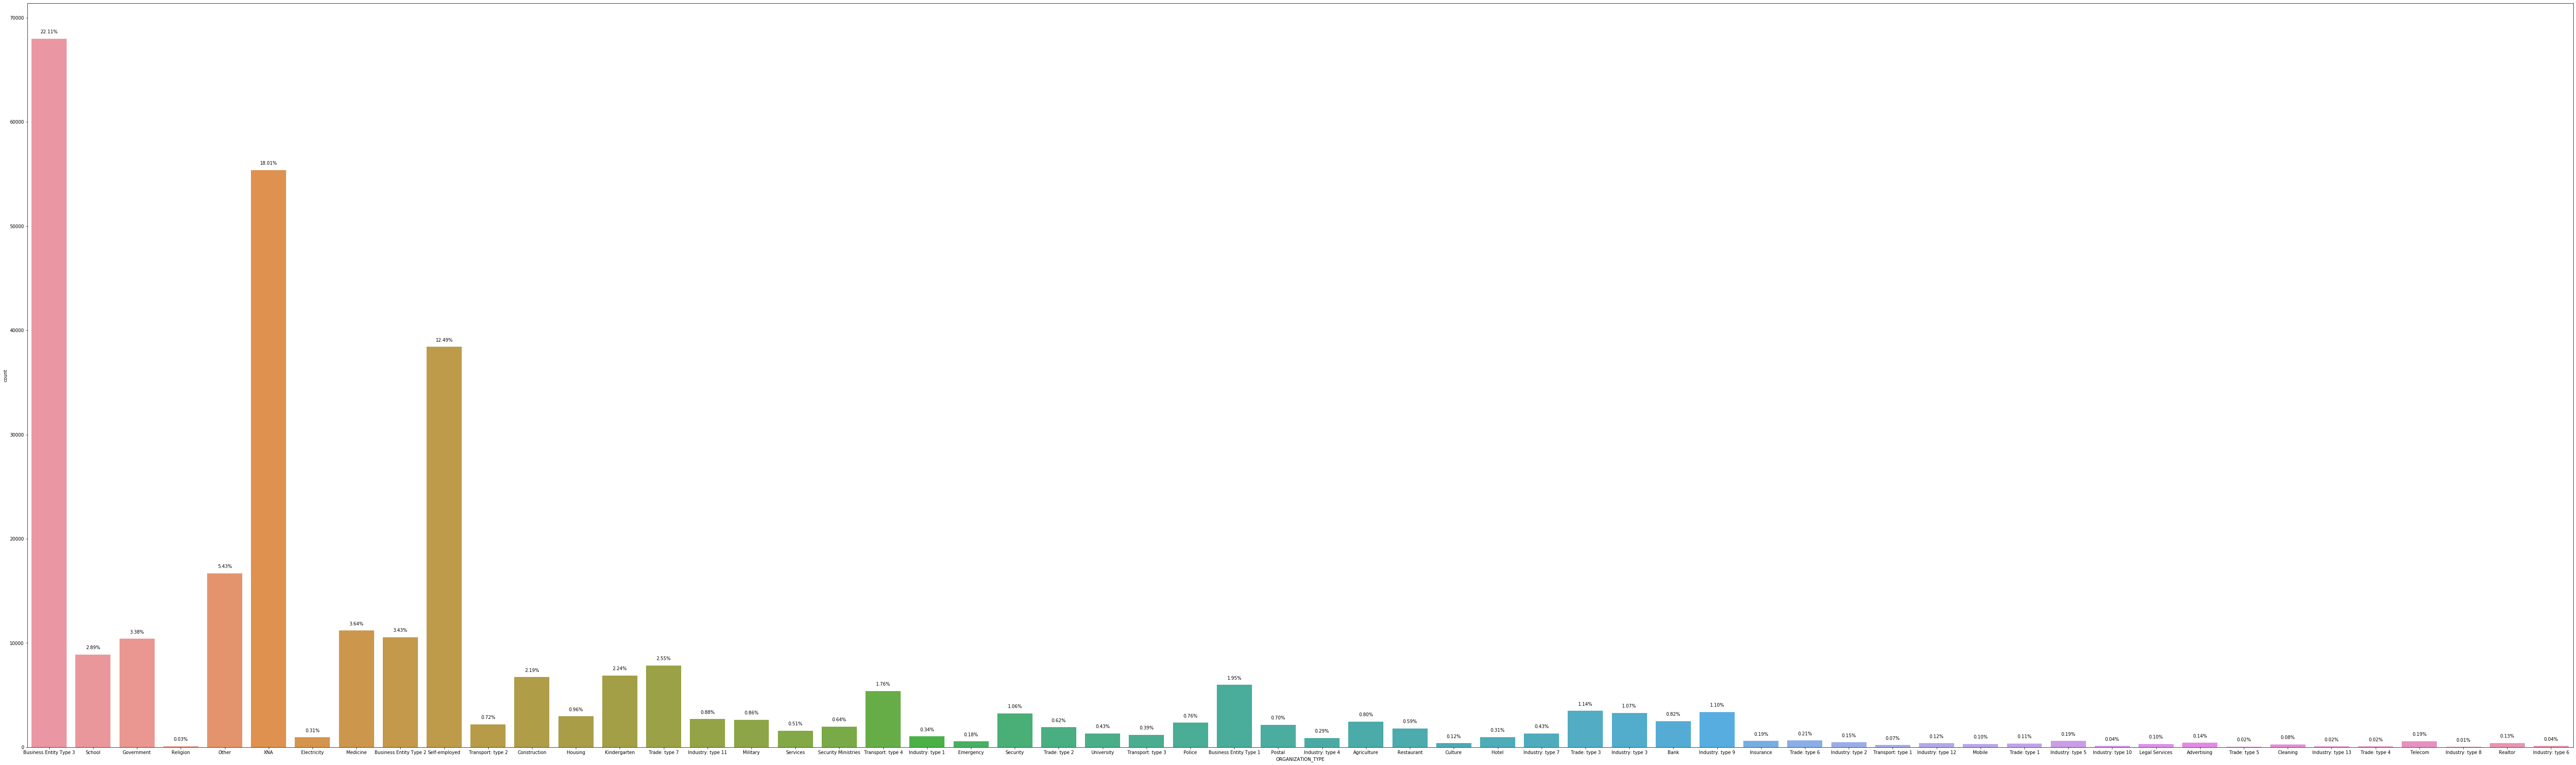

In [175]:
plt.figure(figsize=(100,30))
ax=sns.countplot(dup['ORGANIZATION_TYPE'])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(100 * height/len(app)),
            ha="center")    


- Most of the applicant's organization type is either Business Entity Type 3 (22.11%) or XNA (18.01%) or Self-employed (12.49%)


### TARGET v/s categorical data: 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


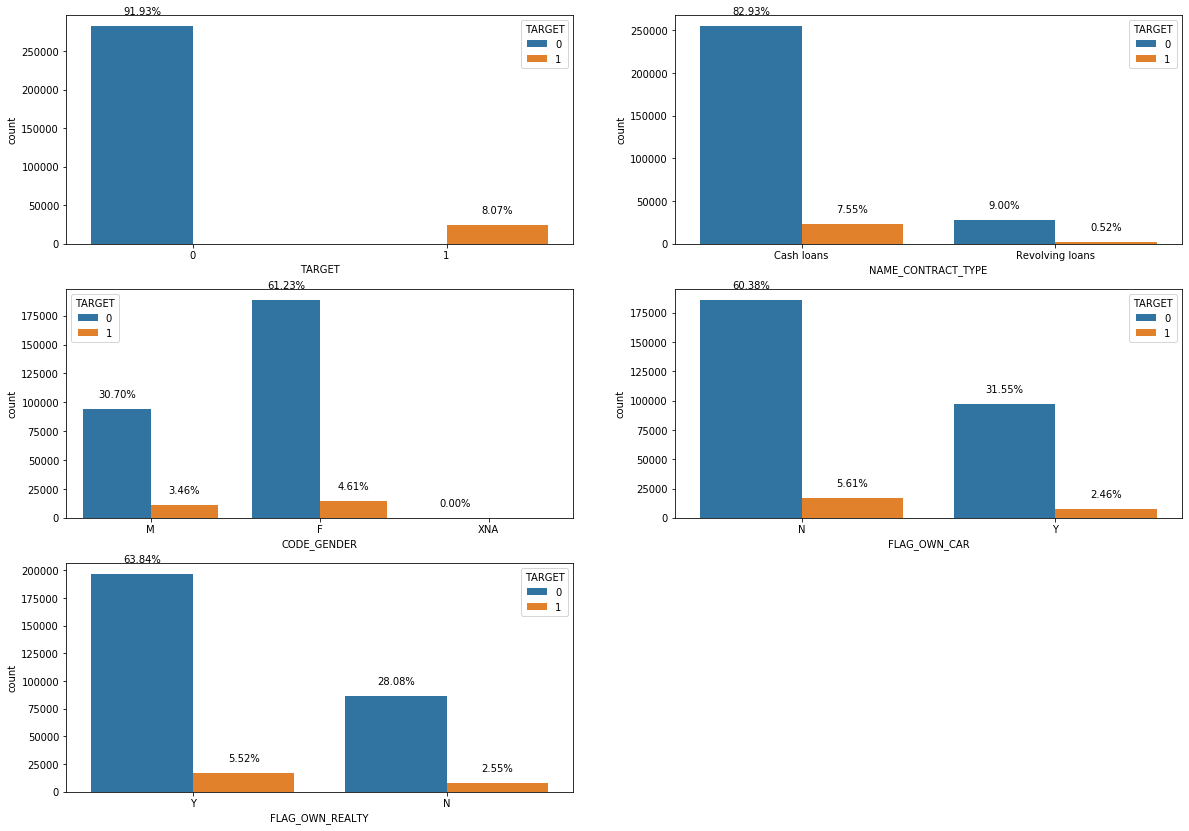

In [176]:
binary1=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']

plt.figure(figsize=(20,100))
for i in enumerate(binary): 
    ax = plt.subplot(20,2, i[0]+1)
    sns.countplot(x=i[1], data=dup,hue ="TARGET")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(app)),
                ha="center")

In [177]:
for i in binary1:
    print(tagVScat(i))

NAME_CONTRACT_TYPE  v/s % TARGET
                         0         1
Cash loans       91.654087  8.345913
Revolving loans  94.521671  5.478329
CODE_GENDER  v/s % TARGET
              0          1
F     93.000672   6.999328
M     89.858080  10.141920
XNA  100.000000   0.000000
FLAG_OWN_CAR  v/s % TARGET
           0         1
N  91.499773  8.500227
Y  92.756270  7.243730
FLAG_OWN_REALTY  v/s % TARGET
           0         1
Y  92.038423  7.961577
N  91.675071  8.324929


- ##### Female applicants faced less payment difficulties than men, as only less than 7% faced less payment difficulties while more than 10% men faced less payment difficulties .

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


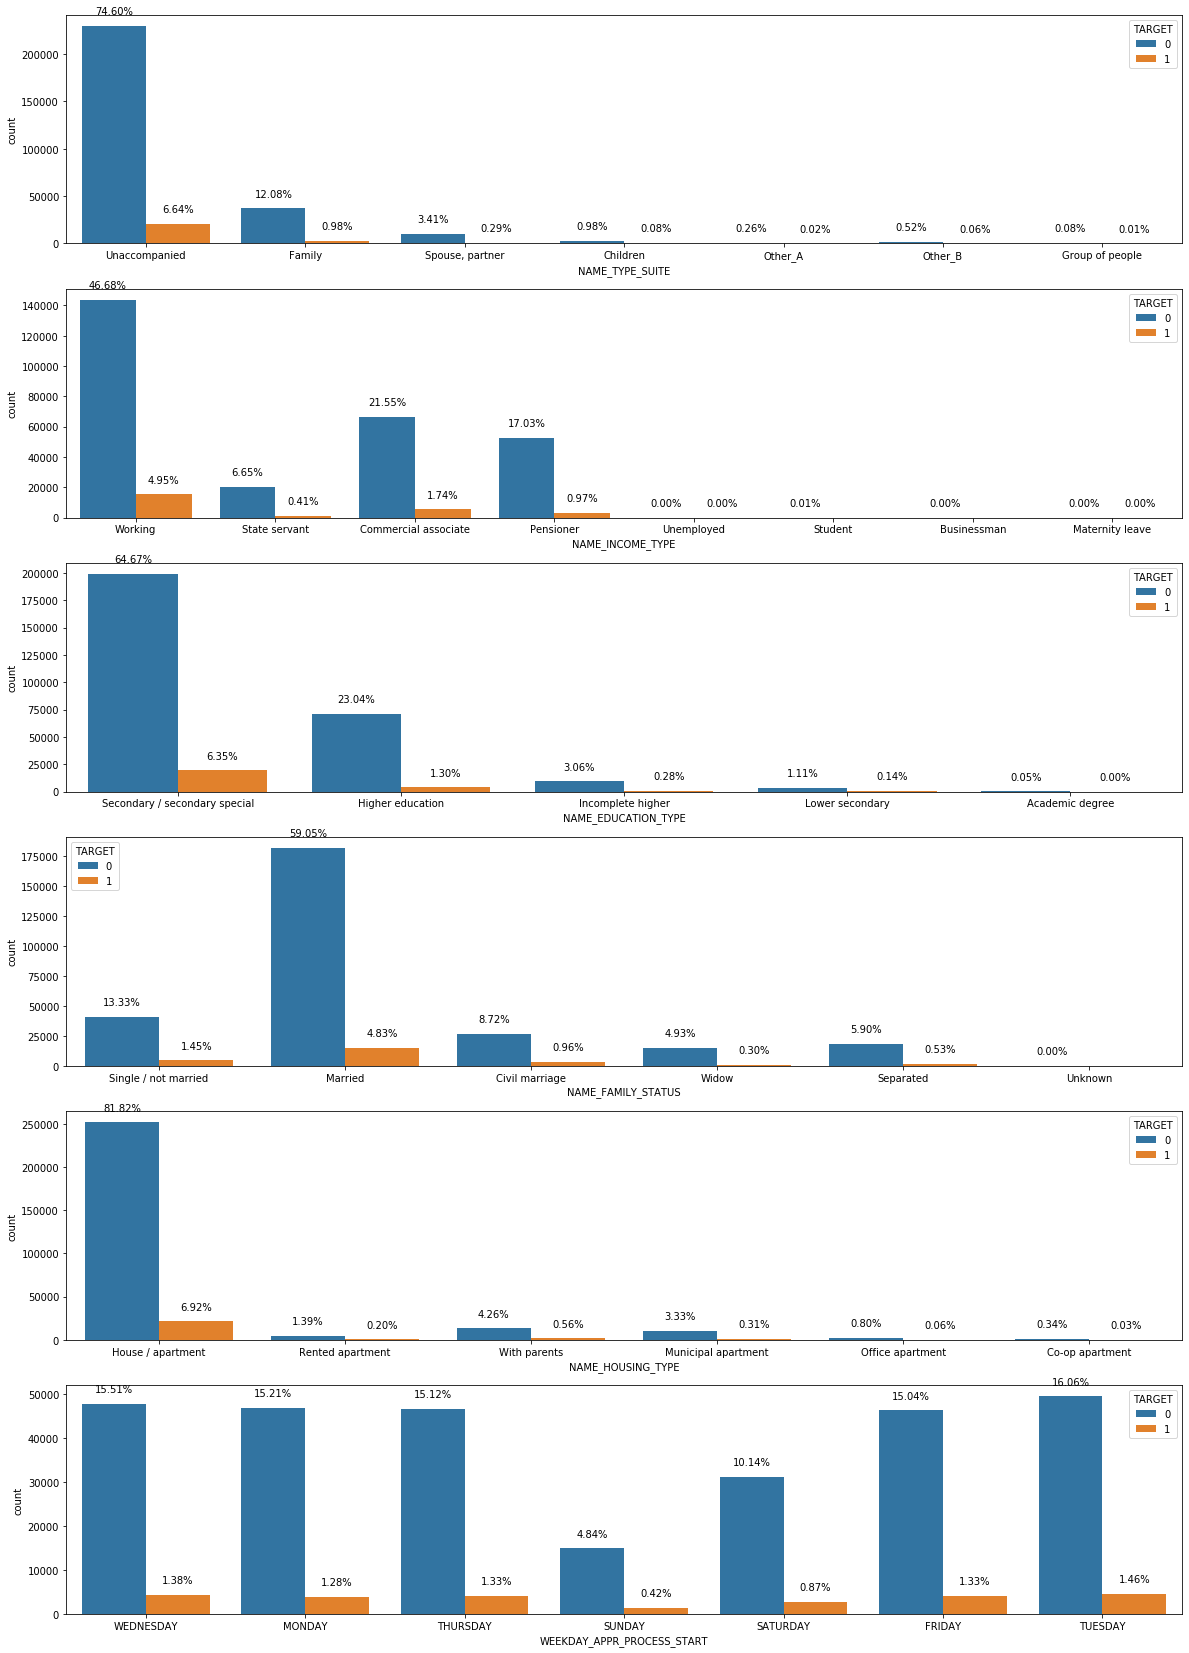

In [178]:
multiclass1=['NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 
        'WEEKDAY_APPR_PROCESS_START']
plt.figure(figsize=(20,100))
for i in enumerate(multiclass1): 
    ax = plt.subplot(20,1, i[0]+1)
    sns.countplot(x=i[1], data=dup,hue ="TARGET")
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(app)),
                ha="center")

In [179]:
multiclass

['NAME_CONTRACT_STATUS',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PRODUCT_TYPE']

In [180]:
multiclass2=['NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE']
multiclass3= ['NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE']

In [181]:
for i in multiclass2:
    print(tagVScat(i))

NAME_TYPE_SUITE  v/s % TARGET
                         0         1
Unaccompanied    91.831253  8.168747
Family           92.505417  7.494583
Spouse, partner  92.128408  7.871592
Children         92.623202  7.376798
Other_B          90.169492  9.830508
Other_A          91.224018  8.775982
Group of people  91.512915  8.487085
NAME_INCOME_TYPE  v/s % TARGET
                               0          1
Working                90.411528   9.588472
Commercial associate   92.515743   7.484257
Pensioner              94.613634   5.386366
State servant          94.245035   5.754965
Student                81.818182  22.222222
Unemployed             77.777778  18.181818
Businessman           100.000000   0.000000
Maternity leave        60.000000  40.000000


- Thoose who are on their Maternity leave and who are students, face difficulties in payment while repaying the loan.
- Out of all applicants only 10 people are Businessman, all of them don't face any payment difficulties.

#### `Check Businessman`

In [182]:
app['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [183]:
business = app.loc[(app['NAME_INCOME_TYPE']=='Businessman'),:]
business

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
29666,0,Revolving loans,M,Y,Y,0,900000.0,2250000.0,112500.0,2250000.0,Unaccompanied,Businessman,Higher education,Married,House / apartment,0.072508,20364,3237,6896.0,3774,WEDNESDAY,14,0,0,0,0,0,0,Self-employed,0.480015,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
29737,0,Revolving loans,M,N,N,0,2250000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Businessman,Higher education,Married,House / apartment,0.032561,12249,5445,5748.0,1984,FRIDAY,17,1,1,0,0,0,0,Bank,0.715923,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
87098,0,Revolving loans,M,Y,Y,1,180000.0,675000.0,33750.0,675000.0,Family,Businessman,Higher education,Married,House / apartment,0.026392,19234,2619,2670.0,2779,SATURDAY,10,0,0,0,0,0,0,Self-employed,0.714725,0.709189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92166,0,Revolving loans,M,Y,Y,0,675000.0,540000.0,27000.0,540000.0,Unaccompanied,Businessman,Higher education,Single / not married,House / apartment,0.011657,14727,4699,8560.0,5456,SUNDAY,14,1,1,0,0,0,0,Self-employed,0.709638,0.479449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
133120,0,Revolving loans,M,Y,Y,0,450000.0,1350000.0,67500.0,1350000.0,Unaccompanied,Businessman,Higher education,Married,House / apartment,0.072508,10741,1627,176.0,2689,THURSDAY,15,0,0,0,0,0,0,Self-employed,0.702637,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
145707,0,Revolving loans,M,Y,Y,0,225000.0,2250000.0,225000.0,2250000.0,Unaccompanied,Businessman,Higher education,Married,House / apartment,0.005144,18325,5130,5726.0,1861,WEDNESDAY,16,0,0,0,0,0,0,Self-employed,0.621377,0.510853,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
213668,0,Revolving loans,F,Y,Y,0,900000.0,2250000.0,112500.0,2250000.0,Unaccompanied,Businessman,Higher education,Single / not married,House / apartment,0.072508,18851,1966,347.0,2406,TUESDAY,13,0,0,0,0,0,0,Self-employed,0.720992,0.621226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235450,0,Revolving loans,F,Y,Y,0,540000.0,900000.0,45000.0,900000.0,Unaccompanied,Businessman,Higher education,Civil marriage,House / apartment,0.011657,10721,568,4824.0,3256,TUESDAY,17,1,1,0,0,0,0,Business Entity Type 3,0.701365,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
254641,0,Revolving loans,F,Y,Y,0,225000.0,225000.0,11250.0,225000.0,Unaccompanied,Businessman,Higher education,Married,House / apartment,0.003069,16349,1686,2584.0,1985,WEDNESDAY,16,0,0,0,0,0,0,Self-employed,0.747437,0.441836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
292267,0,Revolving loans,M,N,N,0,180000.0,495000.0,24750.0,495000.0,Unaccompanied,Businessman,Higher education,Married,House / apartment,0.001417,19158,1766,1163.0,2700,SATURDAY,11,0,0,0,0,0,0,Self-employed,0.549392,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [184]:
for i in multiclass3:
    print(tagVScat(i))

NAME_EDUCATION_TYPE  v/s % TARGET
                                       0          1
Secondary / secondary special  91.060071   8.939929
Higher education               94.644885   5.355115
Incomplete higher              91.515034   8.484966
Lower secondary                89.072327  10.927673
Academic degree                98.170732   1.829268
NAME_FAMILY_STATUS  v/s % TARGET
                               0         1
Married                92.440132  7.559868
Single / not married   90.192325  9.807675
Civil marriage         90.055416  9.944584
Separated              91.805766  8.194234
Widow                  94.175783  5.824217
Unknown               100.000000  0.000000
NAME_HOUSING_TYPE  v/s % TARGET
                             0          1
House / apartment    92.204289   7.795711
With parents         88.301887  11.698113
Municipal apartment  91.460252   8.539748
Rented apartment     87.686949  12.313051
Office apartment     93.427589   6.572411
Co-op apartment      92.067736   7.9

- Those who have completed their Academic degree, among them less than 2% applicants face payment difficulties.

In [185]:
tagVScat('ORGANIZATION_TYPE')

ORGANIZATION_TYPE  v/s % TARGET


,0,1
Business Entity Type 3,90.700377,9.299623
XNA,94.600354,5.399646
Self-employed,89.826096,10.173904
Other,92.357490,7.642510
Medicine,93.415528,6.584472
Government,91.708519,7.218378
Business Entity Type 2,92.781622,8.291481
School,94.085236,5.914764
Trade: type 7,90.550377,9.449623
Kindergarten,92.965116,7.034884



- #### Those who are working in the "Transport: type 3" and "Industry: type 8" organization, among them 15.75% and 12.50% applicants faced payment difficulties respectively.

## `previous application data`

In [186]:
prev_app.head()

,NAME_CONTRACT_TYPE,AMT_APPLICATION,AMT_CREDIT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,Consumer loans,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,middle,POS mobile with interest
1,Cash loans,607500.0,679671.0,THURSDAY,11,Y,1,XNA,Approved,164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,low_action,Cash X-Sell: low
2,Cash loans,112500.0,136444.5,TUESDAY,11,Y,1,XNA,Approved,301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,high,Cash X-Sell: high
3,Cash loans,450000.0,470790.0,MONDAY,7,Y,1,XNA,Approved,512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,middle,Cash X-Sell: middle
4,Cash loans,337500.0,404055.0,THURSDAY,9,Y,1,Repairs,Refused,781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,high,Cash Street: high


### `Numeric`

### Numeric v/s NAME_CONTRACT_STATUS

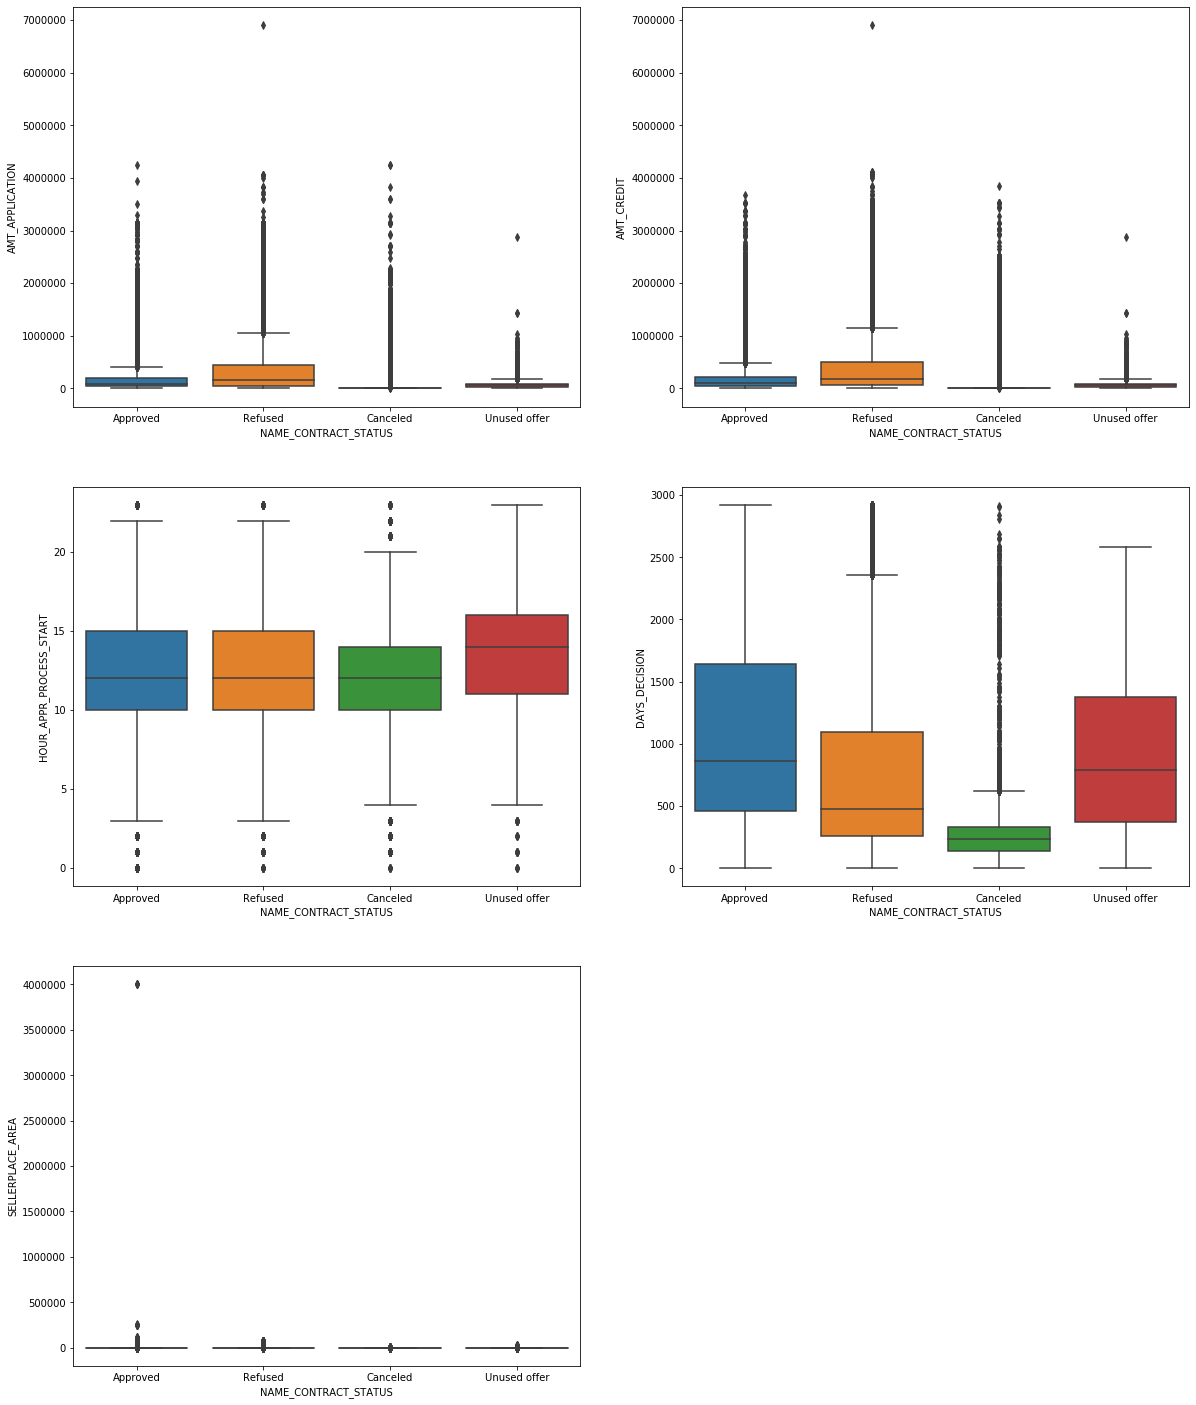

In [187]:
plt.figure(figsize=(20,25))

for j in prev_num:
    plt.subplot((len(prev_num)//2)+1,2,(prev_num.index(j)) + 1)
    sns.boxplot(x = 'NAME_CONTRACT_STATUS', y = j, data = prev_app)

- Here I can see that the average of applied is loan amount is higher for refused cases.
- Also average of revised loan amount by bank (AMT_CREDIT) is higher for refused cases.
- Unused offers were mostly processed at 15th hour of the day.


#### `Category`

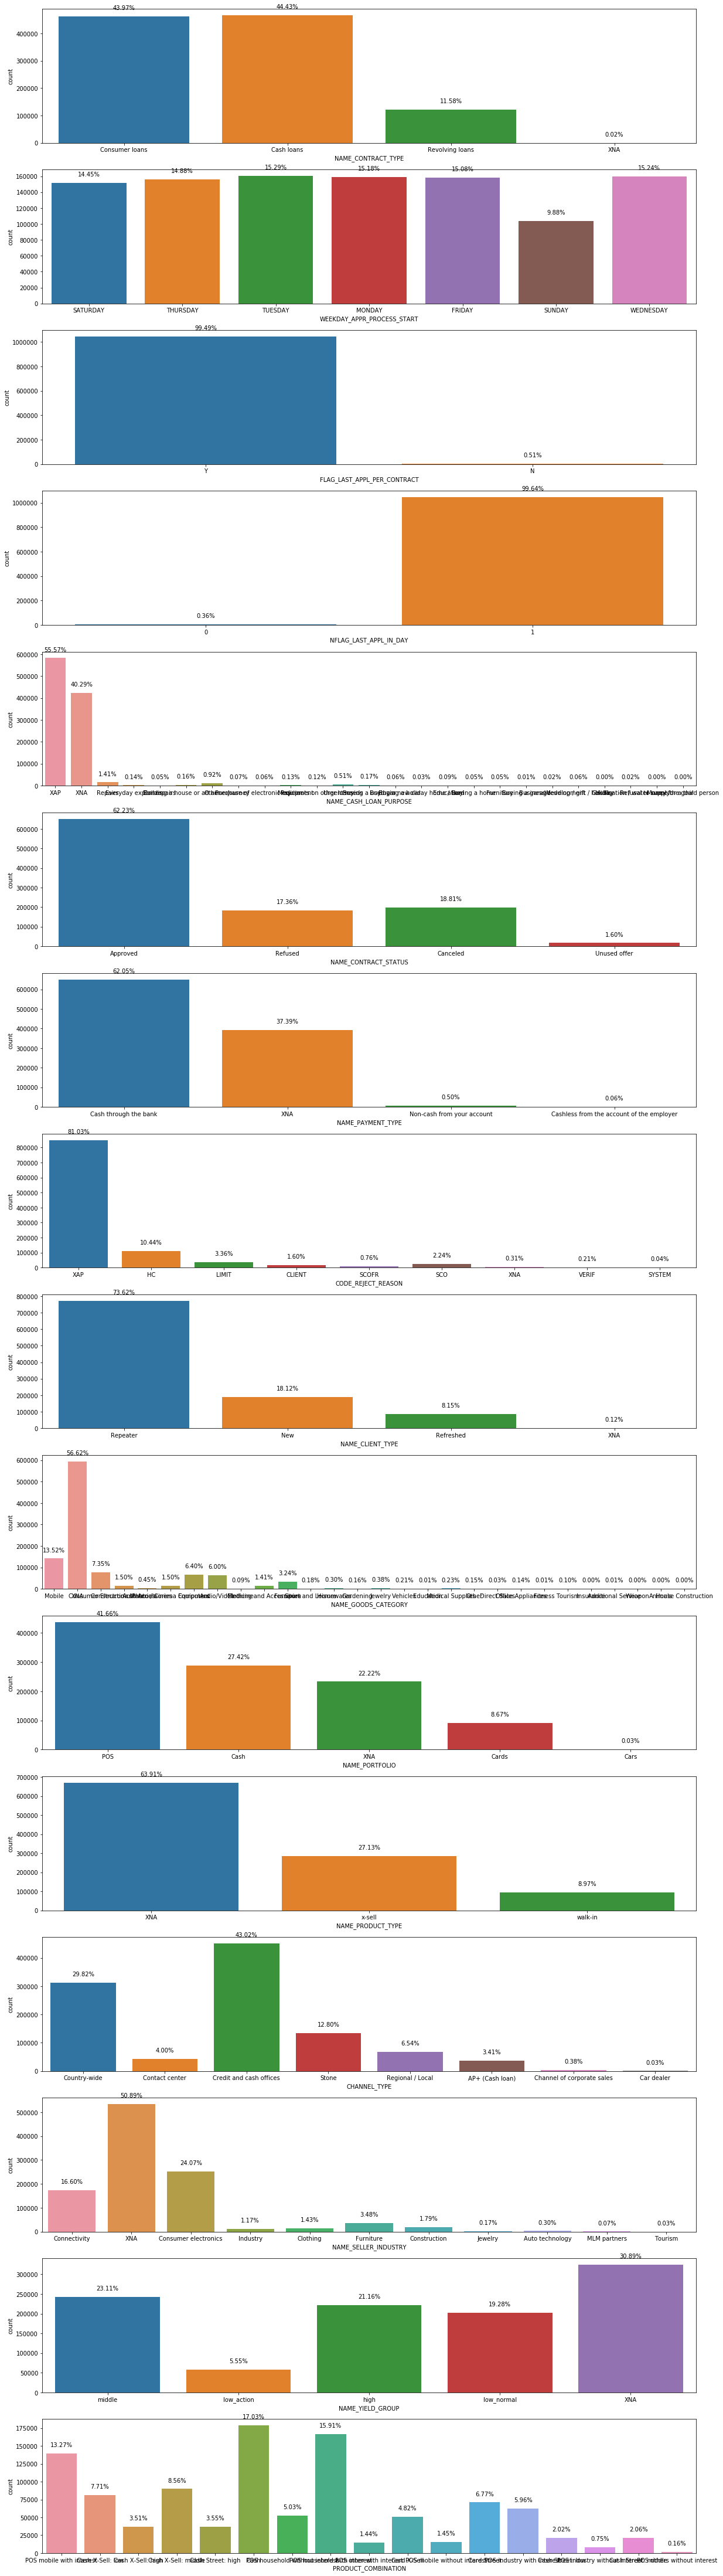

In [188]:
plt.figure(figsize=(20,100))
for i in enumerate(prev_catg): 
    ax = plt.subplot(20,1, i[0]+1)
    sns.countplot(x=i[1], data=prev_app)
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%\n'.format(100 * height/len(prev_app)),
                ha="center")

- Nearly 44% applicant applied for consumer loans and nearly 45% applied cash loans.
- More than 25% of the loan processing start on weekend.
- Over 60% loan got approval
- Over 60% payment types are cash throuh the bank.
- In more than 80% case code reject reason is XAP.
- Over 70% applicants are repeater and 18% are new client.
- Over 60% portfolios are POS.


In [189]:
prev_app['NAME_CONTRACT_STATUS'].value_counts()

Approved        652486
Canceled        197231
Refused         182083
Unused offer     16775
Name: NAME_CONTRACT_STATUS, dtype: int64

In [190]:
def appVScat(x):
    df=prev_app.copy()
    df=prev_app[[x,'NAME_CONTRACT_STATUS']]
    val1 = df.loc[(df['NAME_CONTRACT_STATUS'] == 'Approved'),:][x].value_counts()
    val2 = df.loc[(df['NAME_CONTRACT_STATUS'] == 'Canceled'),:][x].value_counts()
    val3= df.loc[(df['NAME_CONTRACT_STATUS'] == 'Refused'),:][x].value_counts()
    val4 = df.loc[(df['NAME_CONTRACT_STATUS'] == 'Unused offer'),:][x].value_counts()
    val5 = df[x].value_counts()
    mm = pd.DataFrame(val1.values,val1.index)
    mm['Canceled'] = pd.DataFrame(val2.values,val2.index)
    mm['Refused'] = pd.DataFrame(val3.values,val3.index)
    mm['Unused offer']=pd.DataFrame(val4.values,val4.index)
    mm['Total'] = pd.DataFrame(val5.values,val5.index)
    mm.rename(columns = {0:'Approved'}, inplace = True)
    mm['Approved'] = 100* mm['Approved']/mm['Total']
    mm['Canceled'] = 100* mm['Canceled']/mm['Total']
    mm['Refused'] = 100* mm['Refused']/mm['Total']
    mm['Unused offer']=100* mm['Unused offer']/mm['Total']
    print(x,' v/s % NAME_CONTRACT_STATUS')
    return mm[['Approved','Canceled','Refused','Unused offer']]

In [191]:
appVScat('WEEKDAY_APPR_PROCESS_START')

WEEKDAY_APPR_PROCESS_START  v/s % NAME_CONTRACT_STATUS


,Approved,Canceled,Refused,Unused offer
SATURDAY,67.907321,14.701748,15.540509,1.850422
FRIDAY,60.941403,19.482507,18.068632,1.507458
WEDNESDAY,59.798957,20.681367,18.106367,1.413308
TUESDAY,59.495914,20.885270,18.256285,1.362530
THURSDAY,60.191256,20.248556,18.130252,1.429936
MONDAY,58.945332,21.429469,18.121223,1.503977
SUNDAY,71.944924,11.501462,14.122097,2.431517


In [192]:
prev_catg

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [193]:
catg=['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NFLAG_LAST_APPL_IN_DAY',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [194]:
for i in catg:
    print(appVScat(i))
    print()

NAME_CONTRACT_TYPE  v/s % NAME_CONTRACT_STATUS
                  Approved   Canceled    Refused  Unused offer
Consumer loans   85.869832   0.218849  10.340983      3.570336
Cash loans       41.930748  35.850822  22.151887      0.066543
Revolving loans  50.431897  23.881556  25.683254      0.003294

WEEKDAY_APPR_PROCESS_START  v/s % NAME_CONTRACT_STATUS
            Approved   Canceled    Refused  Unused offer
SATURDAY   67.907321  14.701748  15.540509      1.850422
FRIDAY     60.941403  19.482507  18.068632      1.507458
WEDNESDAY  59.798957  20.681367  18.106367      1.413308
TUESDAY    59.495914  20.885270  18.256285      1.362530
THURSDAY   60.191256  20.248556  18.130252      1.429936
MONDAY     58.945332  21.429469  18.121223      1.503977
SUNDAY     71.944924  11.501462  14.122097      2.431517

FLAG_LAST_APPL_PER_CONTRACT  v/s % NAME_CONTRACT_STATUS
    Approved  Canceled    Refused  Unused offer
Y  62.546408   18.9061  16.939464      1.608028

NFLAG_LAST_APPL_IN_DAY  v/s % NAME_

- In 80% cases consumer loan get approved.
- In 22% cases cash loans get refused.
- Those loan applications processed on Sunday, on 71 cases they got approved.
- New client has more approval rate than other clients.
- On 90% cases POS porfolio got approved.

# Q6. Find the top 10 correlation for the Client with payment difficulties and all other cases (Target variable).

#### ` Correlation matrix (TARGET=1)`

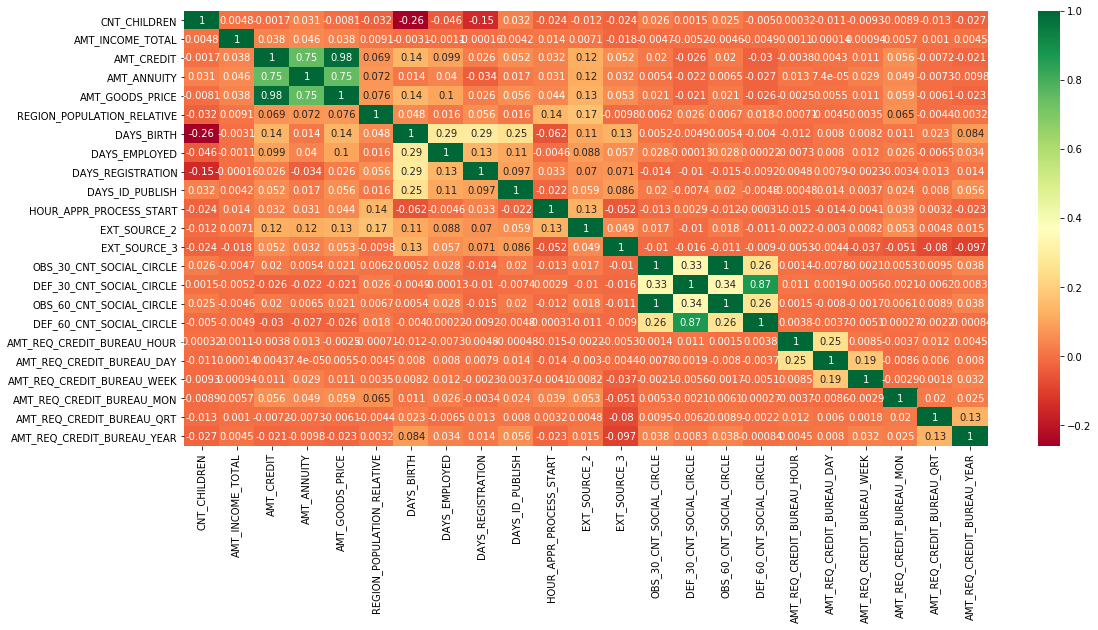

In [195]:
plt.figure(figsize=(18,8))
corr = app.loc[app['TARGET']==1,:].corr()
ax = sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True,
            cmap ="RdYlGn")

#### ` Let's find top 10 correlation from the above matrix`

In [196]:
dl = []
for i in range(10):
    dl.append(get_top_abs_correlations(app, 10).index[i])
x=pd.DataFrame(dl, columns=['Var1','Var2'])
x['Correlation']=pd.DataFrame(get_top_abs_correlations(app, 10).values)
x

,Var1,Var2,Correlation
0,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.998491
1,AMT_CREDIT,AMT_GOODS_PRICE,0.986734
2,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,0.860556
3,AMT_ANNUITY,AMT_GOODS_PRICE,0.774848
4,AMT_CREDIT,AMT_ANNUITY,0.770138
5,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,0.331951
6,DAYS_BIRTH,DAYS_REGISTRATION,0.331912
7,CNT_CHILDREN,DAYS_BIRTH,0.330938
8,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.329721
9,DAYS_BIRTH,DAYS_ID_PUBLISH,0.272691


#### `Let's visualise them`

In [197]:
lst = []
for i in range(10):
    for j in range(2):
        lst.append(get_top_abs_correlations(app, 10).index[i][j])
lst=set(lst)
lst=list(lst)

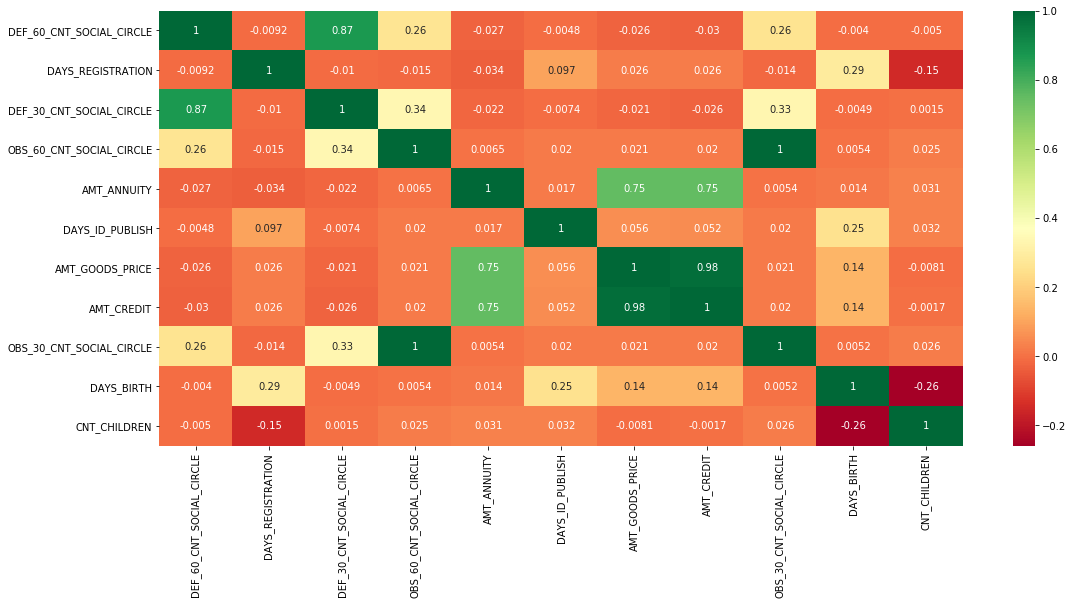

In [198]:
plt.figure(figsize=(18,8))
df = app.loc[app['TARGET']==1,:]
corr = df[lst].corr()
ax = sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot = True,
            cmap ="RdYlGn")